# Proyek Akhir Data Science: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama:I Dewa Gede Mahesta Parawangsa
- Email: dewamahesta2711@gmail.com
- Id Dicoding: demahesta

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# Basic data handling
import pandas as pd
import numpy as np
import warnings
import os
import logging

from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest, f_classif, RFECV

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Train-test split and metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, precision_score, recall_score, f1_score

# LazyPredict for quick model comparison
from lazypredict.Supervised import LazyClassifier

# Model definitions
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.dummy import DummyClassifier
from lightgbm import early_stopping, log_evaluation
from xgboost import XGBClassifier
from sklearn.datasets import make_classification

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler

# Handling imbalance
from imblearn.over_sampling import SMOTE

# Hyperparameter tuning
import optuna
from optuna.integration import OptunaSearchCV

### Menyiapkan data yang akan diguankan

In [2]:
# Data Loading
dataset = os.path.join("dataset", "data.xlsx")
df = pd.read_excel(dataset)

## Data Understanding

### Data Overview

#### Melihat 5 baris dari dataset

In [3]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.00,1,19,12,...,0,0,0,0,0.00,0,10.80,1.40,1.74,Dropout
1,1,15,1,9254,1,1,160.00,1,1,3,...,0,6,6,6,13666666666666600.00,0,13.90,-0.30,0.79,Graduate
2,1,1,5,9070,1,1,122.00,1,37,37,...,0,6,0,0,0.00,0,10.80,1.40,1.74,Dropout
3,1,17,2,9773,1,1,122.00,1,38,37,...,0,6,10,5,12.40,0,9.40,-0.80,-3.12,Graduate
4,2,39,1,8014,0,1,100.00,1,37,38,...,0,6,6,6,13.00,0,13.90,-0.30,0.79,Graduate


#### Melihat informasi dari dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

#### Melihat statistik ringkas dari dataset

In [5]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,...,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00
mean,1.18,18.67,1.73,8856.64,0.89,4.58,132.61,1.87,19.56,22.28,...,0.14,0.54,6.23,8.06,4.44,3928633958049681.00,0.15,11.57,1.23,0.00
std,0.61,17.48,1.31,2063.57,0.31,10.22,13.19,6.91,15.60,15.34,...,0.69,1.92,2.20,3.95,3.01,5970123956711803.00,0.75,2.66,1.38,2.27
min,1.00,1.00,0.00,33.00,0.00,1.00,95.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06
25%,1.00,1.00,1.00,9085.00,1.00,1.00,125.00,1.00,2.00,3.00,...,0.00,0.00,5.00,6.00,2.00,11.00,0.00,9.40,0.30,-1.70
50%,1.00,17.00,1.00,9238.00,1.00,1.00,133.10,1.00,19.00,19.00,...,0.00,0.00,6.00,8.00,5.00,13.00,0.00,11.10,1.40,0.32
75%,1.00,39.00,2.00,9556.00,1.00,1.00,140.00,1.00,37.00,37.00,...,0.00,0.00,7.00,10.00,6.00,11666666666666600.00,0.00,13.90,2.60,1.79
max,6.00,57.00,9.00,9991.00,1.00,43.00,190.00,109.00,44.00,44.00,...,12.00,19.00,23.00,33.00,20.00,18571428571428500.00,12.00,16.20,3.70,3.51


####  Cek missing values pada setiap kolom

In [6]:
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


#### Cek duplikasi pada dataset

In [7]:
duplicate_count = df.duplicated().sum()
print("Number of duplications: ", duplicate_count)

Number of duplications:  0


### Exploratory Data Analysis

#### Analisis Distribusi Target Fitur

In [8]:
status_percentage = df['Status'].value_counts(normalize=True) * 100
status_percentage

Status
Graduate   49.93
Dropout    32.12
Enrolled   17.95
Name: proportion, dtype: float64

Distribusi status mahasiswa dalam dataset adalah: **49.93%** telah **Lulus (Graduate)**, **32.12%** mengalami **Dropout**, dan **17.95%** masih **Terdaftar (Enrolled)**. Angka ini merupakan persentase dari total mahasiswa untuk setiap kategori `Status`.

In [9]:
# Frequency distribution of the Status target variable
status_counts = df['Status'].value_counts()
status_counts

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Dalam dataset, terdapat **2209** mahasiswa yang telah **Lulus (Graduate)**, **1421** mahasiswa yang mengalami **Dropout**, dan **794** mahasiswa yang masih **Terdaftar (Enrolled)**. Angka ini merupakan frekuensi atau jumlah absolut mahasiswa untuk setiap kategori dalam kolom target `Status`.

#### Analisis Fitur Numerik

In [10]:
# Numerical Variable Distributions
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns

['Marital_status',
 'Application_mode',
 'Application_order',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Previous_qualification_grade',
 'Nacionality',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Admission_grade',
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'Age_at_enrollment',
 'International',
 'Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP']

In [11]:
numerical_description = df[numerical_columns].describe()
numerical_description

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,...,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00
mean,1.18,18.67,1.73,8856.64,0.89,4.58,132.61,1.87,19.56,22.28,...,0.14,0.54,6.23,8.06,4.44,3928633958049681.00,0.15,11.57,1.23,0.00
std,0.61,17.48,1.31,2063.57,0.31,10.22,13.19,6.91,15.60,15.34,...,0.69,1.92,2.20,3.95,3.01,5970123956711803.00,0.75,2.66,1.38,2.27
min,1.00,1.00,0.00,33.00,0.00,1.00,95.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06
25%,1.00,1.00,1.00,9085.00,1.00,1.00,125.00,1.00,2.00,3.00,...,0.00,0.00,5.00,6.00,2.00,11.00,0.00,9.40,0.30,-1.70
50%,1.00,17.00,1.00,9238.00,1.00,1.00,133.10,1.00,19.00,19.00,...,0.00,0.00,6.00,8.00,5.00,13.00,0.00,11.10,1.40,0.32
75%,1.00,39.00,2.00,9556.00,1.00,1.00,140.00,1.00,37.00,37.00,...,0.00,0.00,7.00,10.00,6.00,11666666666666600.00,0.00,13.90,2.60,1.79
max,6.00,57.00,9.00,9991.00,1.00,43.00,190.00,109.00,44.00,44.00,...,12.00,19.00,23.00,33.00,20.00,18571428571428500.00,12.00,16.20,3.70,3.51



### Visualisasi Kolom Pertama
Features: Index(['Marital_status', 'Application_mode', 'Application_order'], dtype='object')


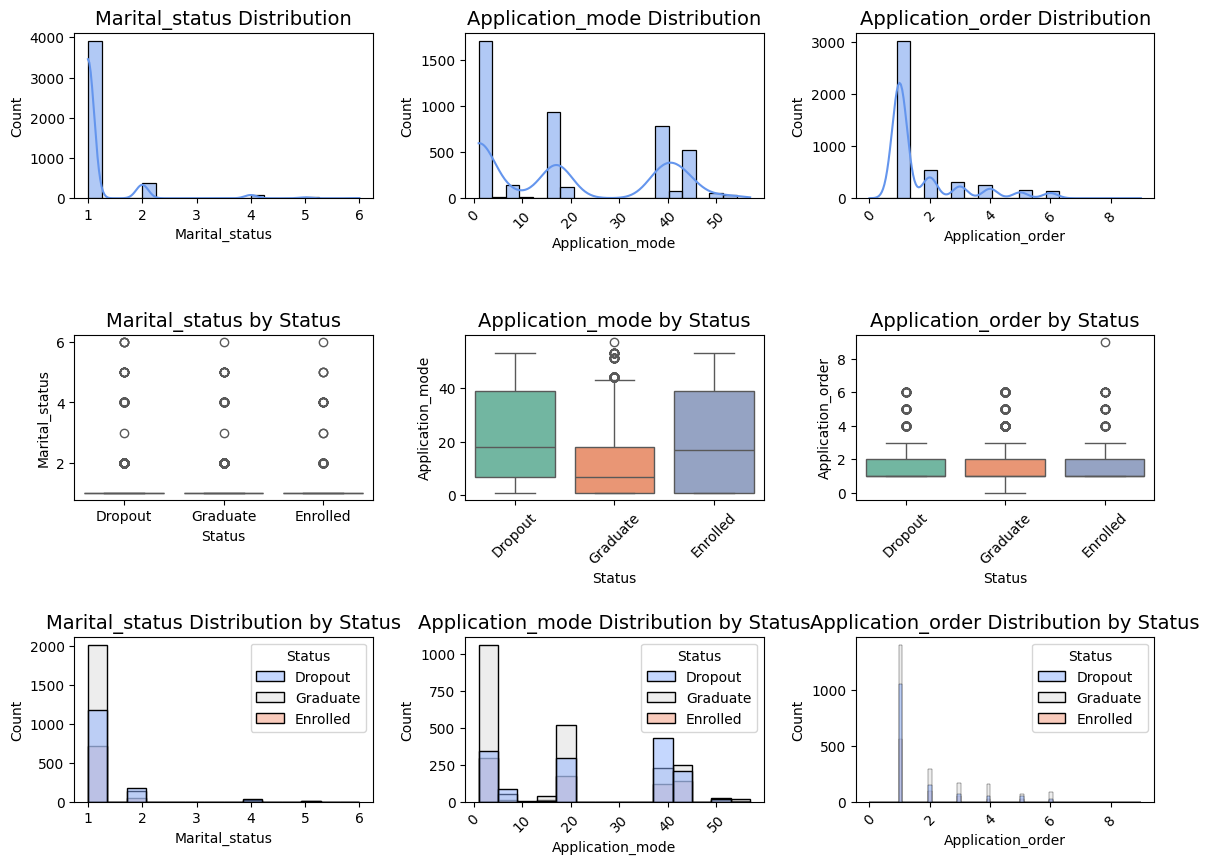

In [12]:
def plot_distribution_analysis(df, numerical_columns, figsize_multiplier=4):
    """
    Combined visualization function for numerical features with better readability
    """
    n_features = len(numerical_columns)
    
    # Dynamically adjust figsize based on number of features
    fig_width = min(n_features * figsize_multiplier, 40)  # Limit max width to 40 (more spacious)
    fig_height = 9  # Fixed height per row
    
    # Create subplots
    fig, axes = plt.subplots(3, n_features, figsize=(fig_width, fig_height))
    
    for idx, col in enumerate(numerical_columns):
        # Histogram
        sns.histplot(data=df, x=col, bins=20, kde=True,
                    ax=axes[0, idx], color='#6495ED')
        axes[0, idx].set_title(f'{col} Distribution', fontsize=14)
        
        # Box plot by Status
        sns.boxplot(data=df, x='Status', y=col,
                   ax=axes[1, idx], palette='Set2')
        axes[1, idx].set_title(f'{col} by Status', fontsize=14)
        
        # Histogram by Status
        sns.histplot(data=df, x=col, hue='Status',
                    ax=axes[2, idx], palette='coolwarm')
        axes[2, idx].set_title(f'{col} Distribution by Status', fontsize=14)
        
        # Rotate labels if necessary
        if len(col) > 15:  # Only rotate if column name is long
            axes[0, idx].tick_params(axis='x', rotation=45)
            axes[1, idx].tick_params(axis='x', rotation=45)
            axes[2, idx].tick_params(axis='x', rotation=45)
    
    # Adjust layout and display
    plt.tight_layout(pad=2)  # Add more padding between subplots
    plt.show()

# Slice the first three numerical columns for visualization
first_columns = df.columns[:3]
print("\n### Visualisasi Kolom Pertama")
print("Features:", first_columns)
plot_distribution_analysis(df, first_columns, figsize_multiplier=4)

Visualisasi ini menganalisis distribusi fitur `Marital_status`, `Application_mode`, dan `Application_order` serta hubungannya dengan `Status` mahasiswa (Dropout, Graduate, Enrolled).

*   **`Marital_status`**: Mayoritas besar mahasiswa adalah *single* (kode 1). Pola ini konsisten di semua kategori `Status`, menunjukkan fitur ini kurang memiliki daya pembeda yang kuat.
*   **`Application_mode`**: Terdapat beberapa jalur pendaftaran populer (kode 1, 17, 39, 44). Mahasiswa yang **Graduate** cenderung terkonsentrasi pada mode aplikasi dengan kode lebih rendah. Sebaliknya, mahasiswa **Dropout** dan **Enrolled** menunjukkan sebaran yang lebih luas dan seringkali pada kode mode yang lebih tinggi (misalnya, kode 39 untuk "Over 23 years old").
*   **`Application_order`**: Didominasi oleh pilihan pertama (nilai 0 atau 1) untuk semua kategori `Status`. Fitur ini juga kurang menunjukkan perbedaan signifikan antar status mahasiswa.

`Application_mode` tampak paling informatif dalam membedakan status mahasiswa pada tahap awal analisis ini, dibandingkan `Marital_status` dan `Application_order` yang cenderung lebih homogen antar status.


### Visualisasi Kolom Berikutnya
Features: Index(['Course', 'Daytime_evening_attendance', 'Previous_qualification'], dtype='object')


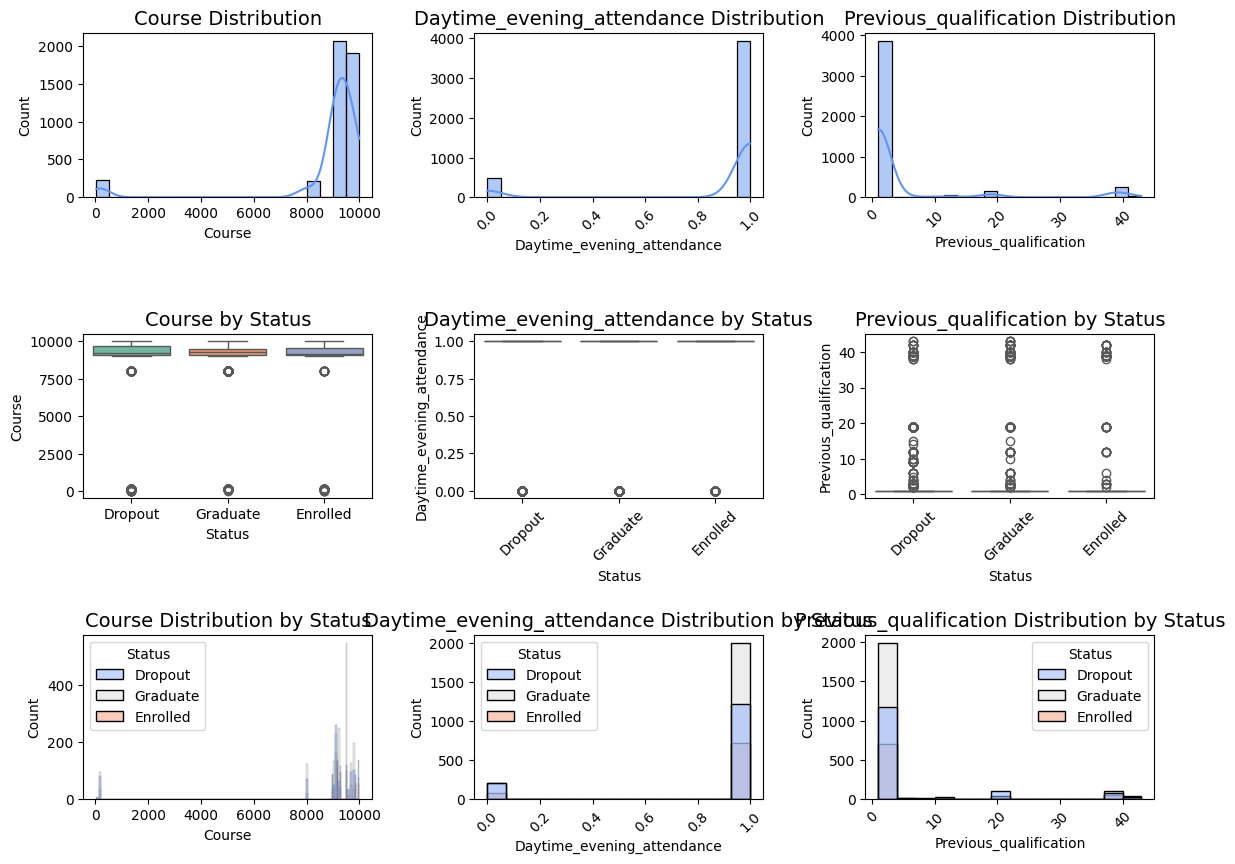

In [13]:
# Slice the next set of columns for analysis
next_columns = df.columns[3:6]
print("\n### Visualisasi Kolom Berikutnya")
print("Features:", next_columns)
plot_distribution_analysis(df, next_columns, figsize_multiplier=4)

Visualisasi ini menganalisis distribusi fitur `Course`, `Daytime_evening_attendance`, dan `Previous_qualification`, serta hubungannya dengan `Status` mahasiswa (Dropout, Graduate, Enrolled).

*   **`Course`**: Mayoritas mahasiswa mengambil program studi dengan kode tinggi. Meskipun terdapat variasi, tidak ada preferensi kode program studi yang sangat mencolok antar status mahasiswa, dengan beberapa *outlier* kode rendah di semua kategori.
*   **`Daytime_evening_attendance`**: Hampir seluruh mahasiswa mengikuti perkuliahan siang (kode 1). Perkuliahan malam (kode 0) sangat jarang; di antara yang sedikit ini, mahasiswa **Dropout** tampak memiliki proporsi sedikit lebih tinggi, namun jumlahnya kecil untuk kesimpulan kuat.
*   **`Previous_qualification`**: Kualifikasi sebelumnya didominasi kode 1 (kemungkinan besar Pendidikan Menengah) untuk semua status. Kualifikasi lain (misalnya, kode 39, 40) juga ada, dengan mahasiswa **Graduate** mungkin sedikit lebih banyak pada beberapa kualifikasi non-dominan ini, namun kode 1 tetap paling umum.

Ketiga fitur ini (`Course`, `Daytime_evening_attendance`, `Previous_qualification`) menunjukkan bahwa kategori dominan (program studi kode tinggi, kuliah siang, kualifikasi sebelumnya kode 1) umum dijumpai pada semua status mahasiswa. Perbedaan antar status tampak kurang signifikan dibandingkan fitur lain seperti `Application_mode`.


### Visualisasi Kolom Selanjutnya
Features: Index(['Previous_qualification_grade', 'Nacionality', 'Mothers_qualification'], dtype='object')


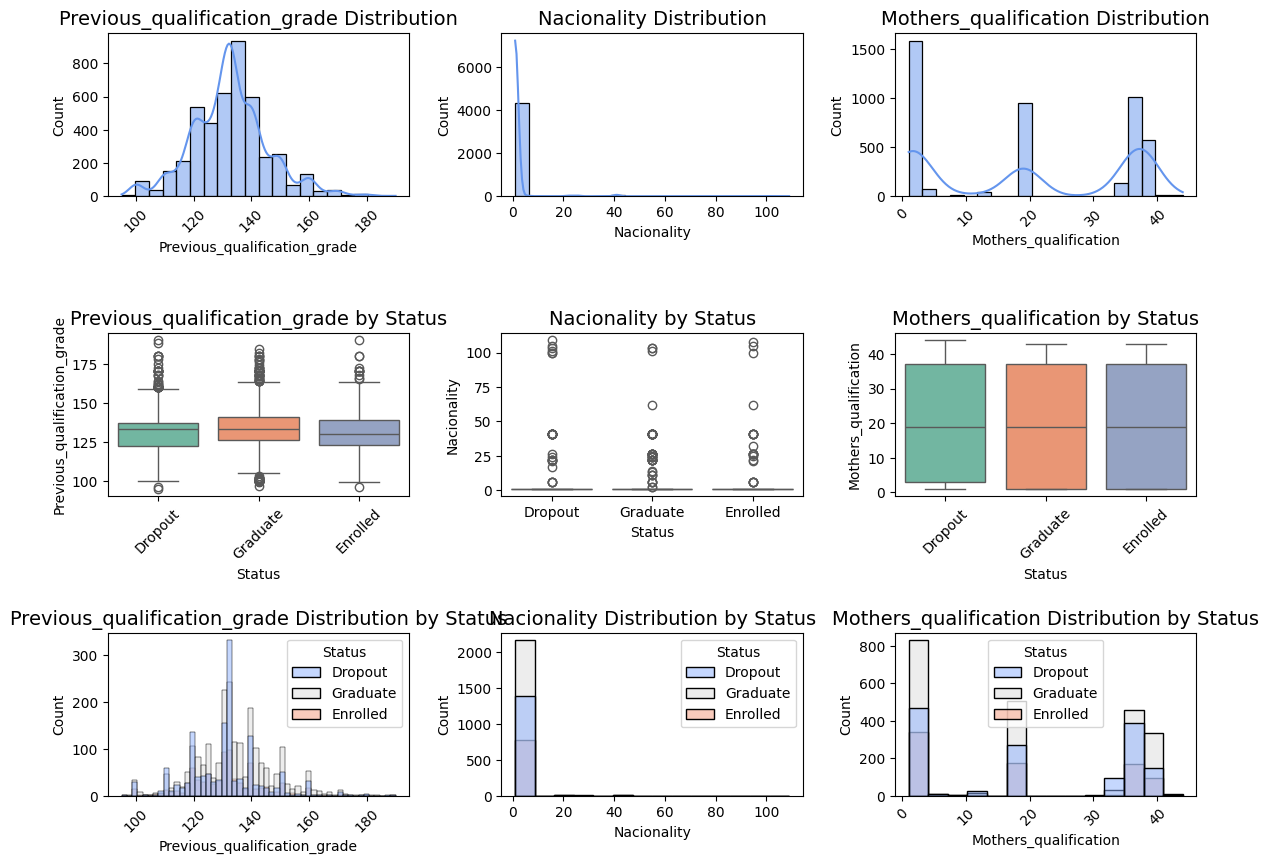

In [14]:
# Slice the next set of columns for analysis
more_columns = df.columns[6:9]
print("\n### Visualisasi Kolom Selanjutnya")
print("Features:", more_columns)
plot_distribution_analysis(df, more_columns, figsize_multiplier=4)

Visualisasi ini menganalisis distribusi fitur `Previous_qualification_grade`, `Nacionality`, dan `Mothers_qualification`, serta hubungannya dengan `Status` mahasiswa (Dropout, Graduate, Enrolled).

*   **`Previous_qualification_grade`**: Mahasiswa yang **Graduate** cenderung memiliki nilai kualifikasi sebelumnya yang sedikit lebih tinggi dan lebih terkonsentrasi. Sebaliknya, mahasiswa **Dropout** menunjukkan sebaran nilai yang lebih lebar, termasuk ke arah nilai yang lebih rendah.
*   **`Nacionality`**: Satu kode kebangsaan (Portugis, kode 1) sangat mendominasi di semua kategori `Status`. Kebangsaan lain sangat jarang, sehingga fitur ini memiliki daya pembeda yang terbatas pada tahap ini.
*   **`Mothers_qualification`**: Distribusi kualifikasi ibu bersifat multimodal. Meskipun terdapat tumpang tindih yang signifikan, ada indikasi bahwa mahasiswa **Graduate** mungkin memiliki ibu dengan kualifikasi yang cenderung lebih tinggi atau pada kode-kode tertentu dibandingkan dengan mahasiswa **Dropout**.

`Previous_qualification_grade` menunjukkan perbedaan yang cukup jelas antar status, sementara `Mothers_qualification` memberikan beberapa petunjuk. `Nacionality` kurang informatif karena distribusinya yang sangat tidak seimbang.


Skewness Analysis of Numerical Features:
                                         Feature  Skewness
7                                    Nacionality     10.70
14                     Educational_special_needs      9.15
26  Curricular_units_1st_sem_without_evaluations      8.21
32  Curricular_units_2nd_sem_without_evaluations      7.27
20                                 International      6.10
11                            Fathers_occupation      5.40
10                            Mothers_occupation      5.34
27             Curricular_units_2nd_sem_credited      4.63
0                                 Marital_status      4.40
21             Curricular_units_1st_sem_credited      4.17
5                         Previous_qualification      2.87
15                                        Debtor      2.43
19                             Age_at_enrollment      2.05
2                              Application_order      1.88
22             Curricular_units_1st_sem_enrolled      1.62
18            

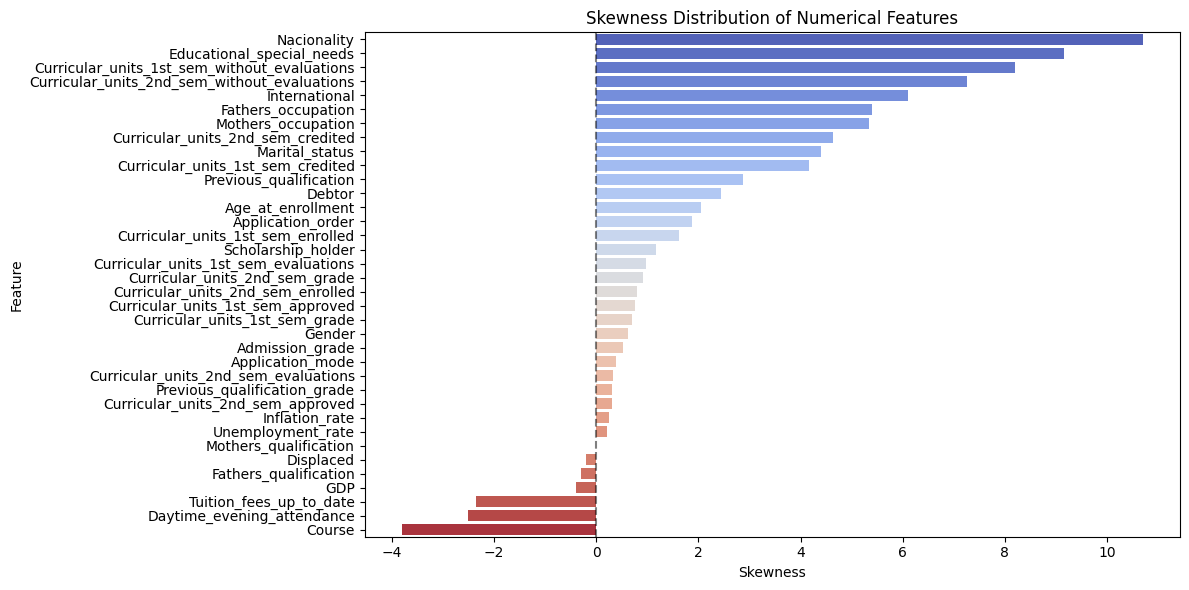

In [15]:
# Calculate skewness for numerical features
skew_report = df.skew(numeric_only=True).reset_index()
skew_report.columns = ['Feature', 'Skewness']
skew_report = skew_report.sort_values('Skewness', ascending=False)

# Display skewness report
print("\nSkewness Analysis of Numerical Features:")
print(skew_report)

# Visualize skewness distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Skewness', y='Feature', data=skew_report, palette='coolwarm')
plt.title('Skewness Distribution of Numerical Features')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Analisis ini menampilkan tingkat kemiringan (skewness) dari distribusi fitur-fitur numerik dalam dataset, yang diurutkan dari paling positif hingga paling negatif.

*   **Sangat Positif Miring (Highly Positively Skewed):** Fitur seperti `Nacionality` (10.70), `Educational_special_needs` (9.15), dan beberapa fitur terkait unit kurikuler menunjukkan mayoritas data terkonsentrasi pada nilai-nilai rendah dengan beberapa nilai ekstrem tinggi.
*   **Relatif Simetris (Relatively Symmetrical):** Fitur seperti `Mothers_qualification` (0.00), `Previous_qualification_grade` (0.31), dan `GDP` (-0.39) memiliki distribusi yang mendekati normal atau seimbang.
*   **Sangat Negatif Miring (Highly Negatively Skewed):** Fitur seperti `Course` (-3.81), `Daytime_evening_attendance` (-2.51), dan `Tuition_fees_up_to_date` (-2.35) menunjukkan mayoritas data terkonsentrasi pada nilai-nilai tinggi dengan beberapa nilai ekstrem rendah.

Identifikasi kemiringan ini penting karena distribusi yang sangat miring dapat mempengaruhi performa beberapa model machine learning dan seringkali memerlukan transformasi data.

#### Analisis Fitur Kategorikal (Target Feature)

In [16]:
# Categorical Column Distribution
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_columns

['Status']

Hanya fitur `Status` yang teridentifikasi sebagai kolom kategorikal (non-numerik). Ini berarti semua fitur kategorikal lain dalam dataset telah di-encode menjadi format numerik.

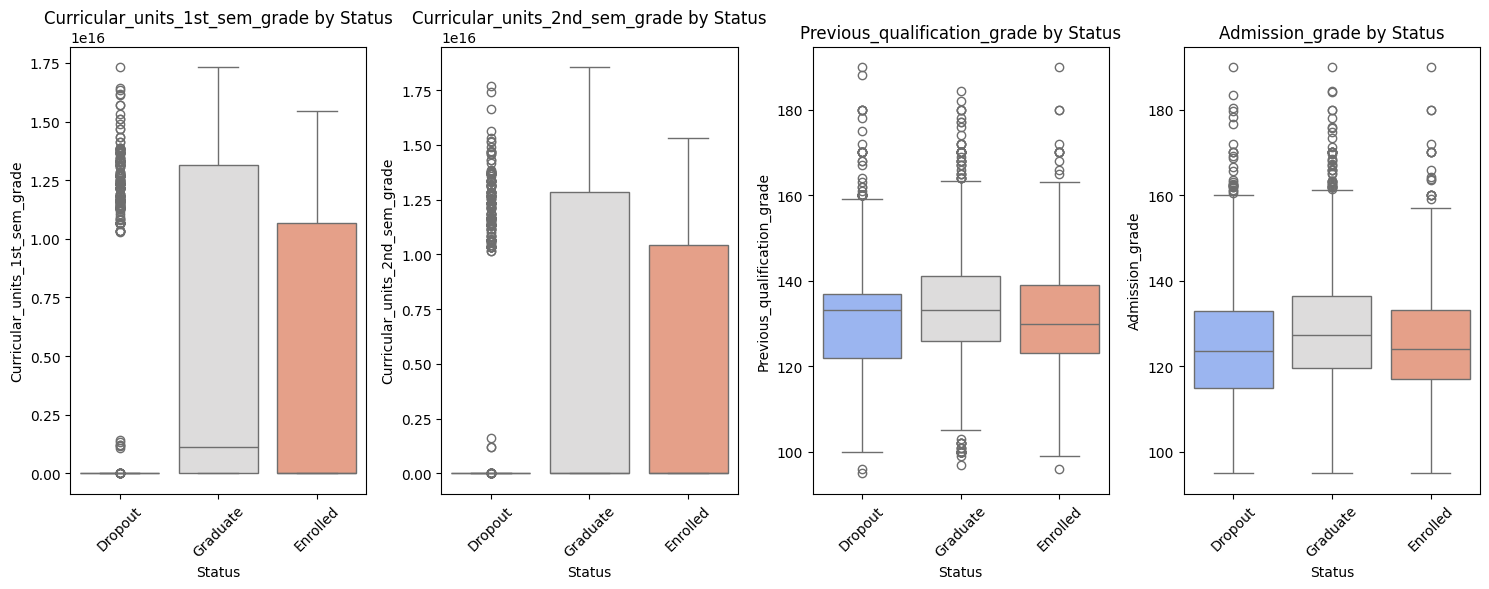

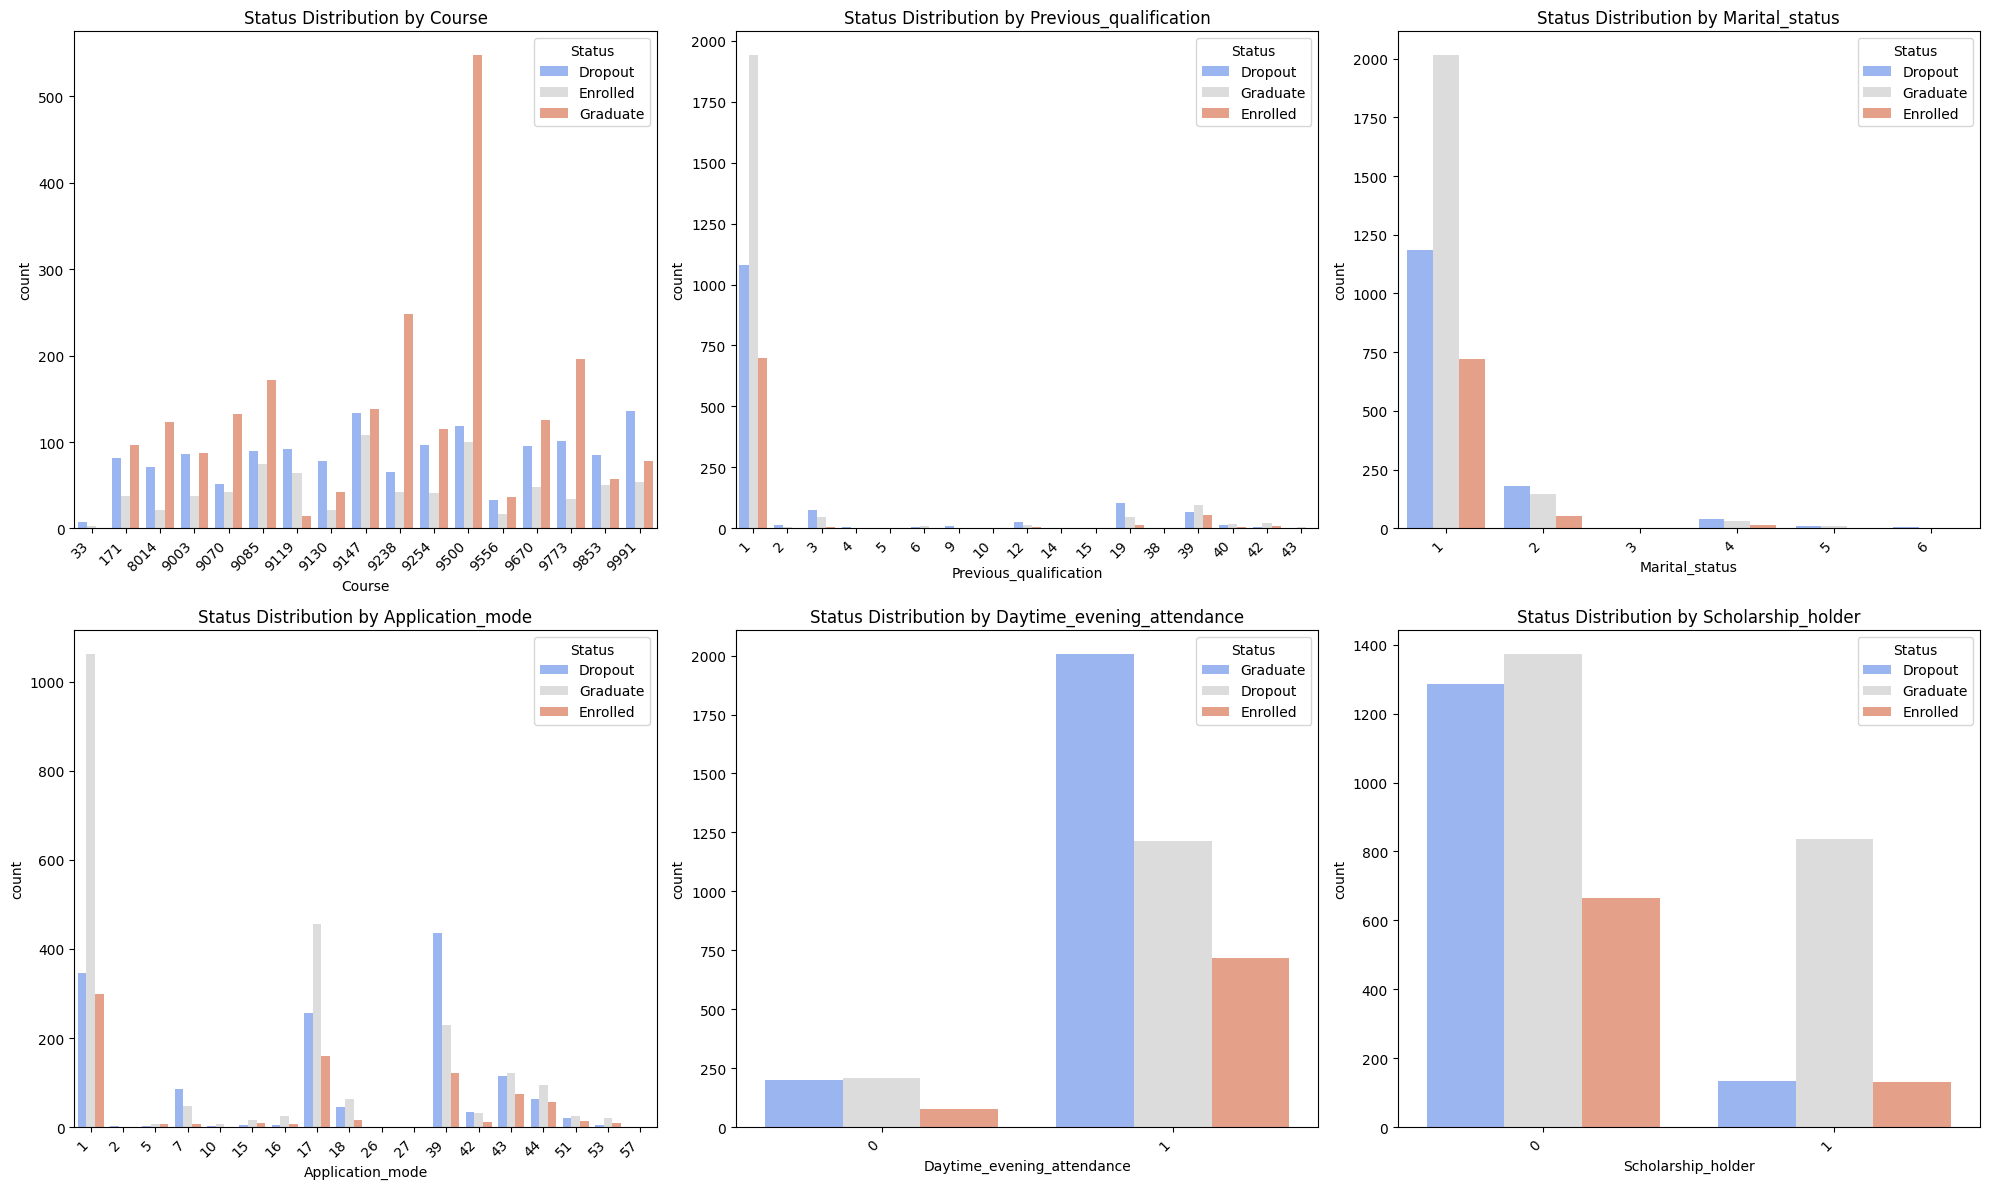

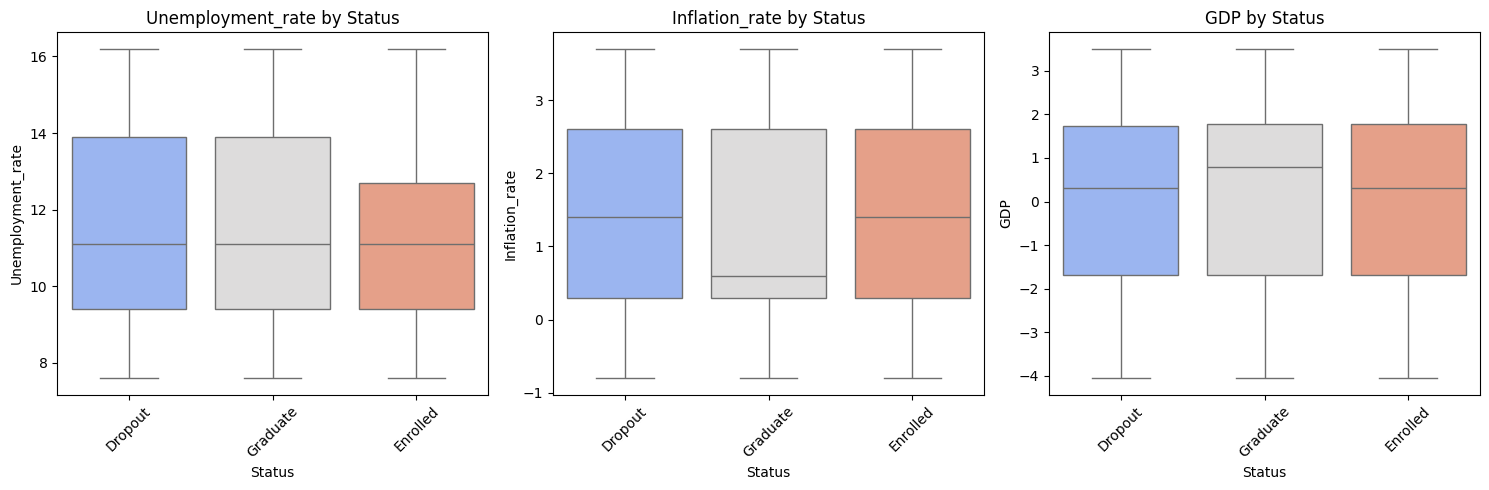

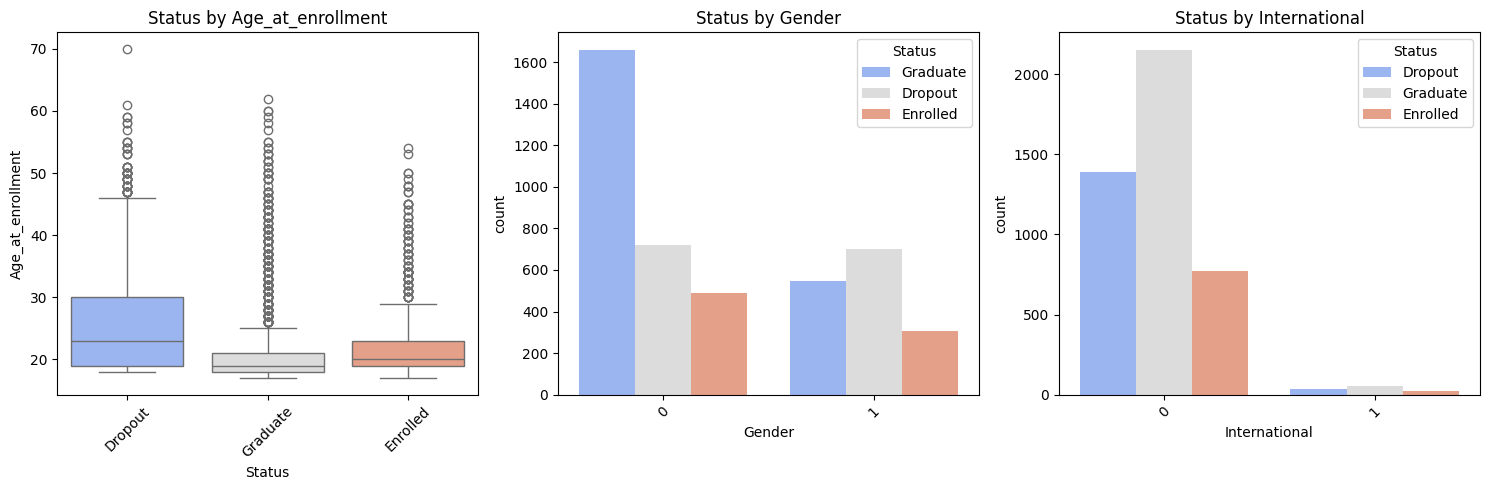

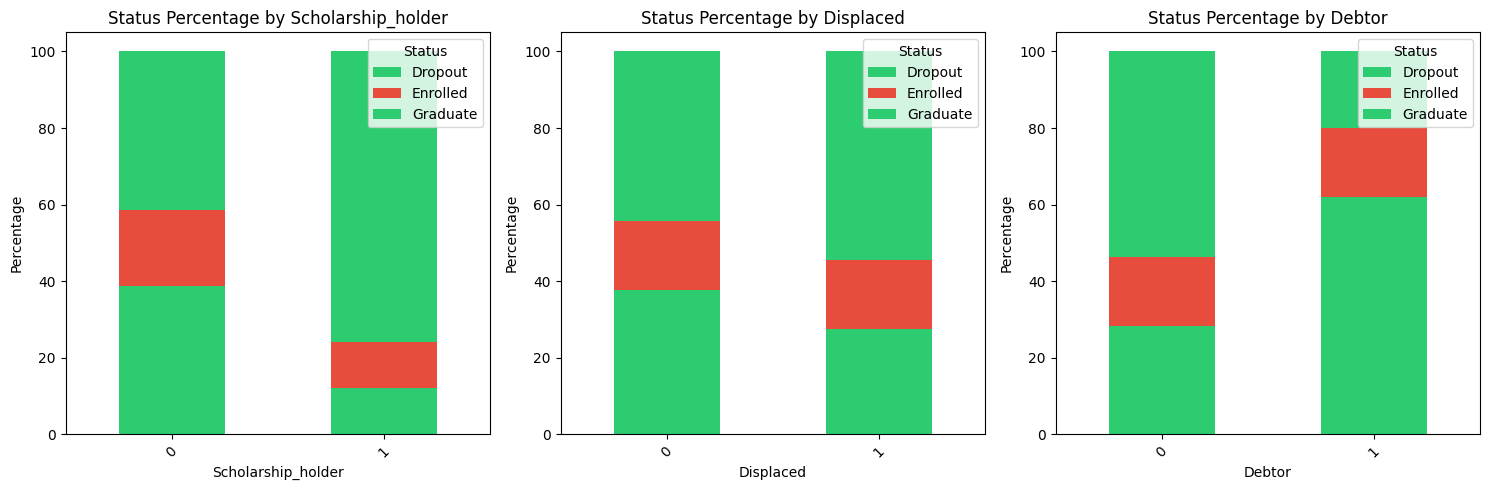

In [17]:
# Academic Performance Metrics
academic_vars = ['Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade', 
                'Previous_qualification_grade', 'Admission_grade']
plt.figure(figsize=(15, 6))

for i, var in enumerate(academic_vars):
    plt.subplot(1, 4, i+1)
    sns.boxplot(data=df, x='Status', y=var, palette='coolwarm')
    plt.title(f'{var} by Status')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Categorical Variables
categorical_vars = ['Course', 'Previous_qualification', 'Marital_status', 
                   'Application_mode', 'Daytime_evening_attendance', 'Scholarship_holder']
n_rows = 2
n_cols = 3
plt.figure(figsize=(20, 12))

for i, var in enumerate(categorical_vars):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(data=df, x=var, hue='Status', palette='coolwarm')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Status Distribution by {var}')
    plt.legend(title='Status')
    
plt.tight_layout()
plt.show()

# Economic Indicators
economic_vars = ['Unemployment_rate', 'Inflation_rate', 'GDP']
plt.figure(figsize=(15, 5))

for i, var in enumerate(economic_vars):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x='Status', y=var, palette='coolwarm')
    plt.title(f'{var} by Status')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Student Demographics
plt.figure(figsize=(15, 5))
demographic_vars = ['Age_at_enrollment', 'Gender', 'International']

for i, var in enumerate(demographic_vars):
    plt.subplot(1, 3, i+1)
    if var in ['Gender', 'International']:
        sns.countplot(data=df, x=var, hue='Status', palette='coolwarm')
    else:
        sns.boxplot(data=df, x='Status', y=var, palette='coolwarm')
    plt.title(f'Status by {var}')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

# Percentage Distribution for Key Categorical Variables
plt.figure(figsize=(15, 5))
key_cats = ['Scholarship_holder', 'Displaced', 'Debtor']

for i, var in enumerate(key_cats):
    plt.subplot(1, 3, i+1)
    
    # Calculate percentages
    prop_data = pd.crosstab(df[var], df['Status'], normalize='index') * 100
    
    # Plot stacked bars
    prop_data.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#2ecc71', '#e74c3c'])
    plt.title(f'Status Percentage by {var}')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.legend(title='Status')

plt.tight_layout()
plt.show()

Visualisasi ini merangkum hubungan berbagai fitur dengan `Status` mahasiswa (Dropout, Graduate, Enrolled), menyoroti pola-pola kunci:

*   **Performa Akademik (Nilai):**
    *   Mahasiswa **Graduate** secara konsisten menunjukkan median nilai yang lebih tinggi pada `Curricular_units_1st_sem_grade`, `Curricular_units_2nd_sem_grade`, `Previous_qualification_grade`, dan `Admission_grade` dibandingkan mahasiswa **Dropout** dan **Enrolled**. Distribusi nilai untuk **Graduate** juga lebih terkonsentrasi pada rentang yang lebih tinggi.

*   **Karakteristik Pendaftaran dan Kehadiran:**
    *   **`Course`**: Distribusi status bervariasi antar program studi; beberapa program studi memiliki proporsi **Graduate** yang lebih tinggi, sementara yang lain lebih banyak **Dropout**.
    *   **`Application_mode`**: Mode aplikasi dengan kode rendah menunjukkan proporsi **Graduate** yang lebih tinggi. Sebaliknya, mode aplikasi dengan kode lebih tinggi, seperti jalur "Over 23 years old" (kode 39), memiliki insiden **Dropout** dan **Enrolled** yang lebih signifikan.
    *   **`Daytime_evening_attendance`**: Mayoritas mahasiswa adalah peserta kuliah siang (1). Peserta kuliah malam (0), meskipun jumlahnya sedikit, menunjukkan proporsi **Dropout** yang lebih tinggi.

*   **Demografi dan Latar Belakang:**
    *   **`Previous_qualification`**: Kualifikasi sebelumnya dengan kode 1 (Pendidikan Menengah) adalah yang paling umum di semua status.
    *   **`Marital_status`**: Status *single* (kode 1) mendominasi secara absolut di semua kategori `Status`.
    *   **`Age_at_enrollment`**: Mahasiswa **Graduate** memiliki usia pendaftaran median yang lebih muda dengan sebaran yang lebih sempit. Mahasiswa **Dropout** dan **Enrolled** menunjukkan rentang usia yang lebih luas dan median usia yang lebih tinggi.
    *   **`Gender`**: Terdapat proporsi **Graduate** yang lebih tinggi pada perempuan (0), dan proporsi **Dropout** yang lebih tinggi pada laki-laki (1).
    *   **`International`**: Mayoritas adalah mahasiswa non-internasional (0).

*   **Status Sosio-Ekonomi:**
    *   **`Scholarship_holder`**: Penerima beasiswa (1) memiliki persentase **Graduate** yang lebih tinggi dan persentase **Dropout** yang lebih rendah dibandingkan non-penerima (0).
    *   **`Displaced`**: Mahasiswa non-*displaced* (0) memiliki persentase **Graduate** yang lebih tinggi. Mahasiswa *displaced* (1) menunjukkan persentase **Dropout** yang lebih tinggi.
    *   **`Debtor`**: Mahasiswa yang tidak memiliki tunggakan (0) memiliki persentase **Graduate** yang jauh lebih tinggi. Mahasiswa *debtor* (1) memiliki persentase **Dropout** yang sangat dominan.

*   **Indikator Ekonomi Makro:**
    *   `Unemployment_rate`, `Inflation_rate`, dan `GDP` menunjukkan tumpang tindih yang besar antar status, mengindikasikan daya pembeda yang lebih rendah pada level individual mahasiswa.

Performa akademik (nilai), usia saat pendaftaran, gender, status beasiswa, status tunggakan, dan mode aplikasi adalah prediktor yang kuat untuk status mahasiswa. Faktor lain seperti status perkawinan atau kebangsaan (yang telah di-encode dan sangat didominasi satu kategori) kurang menunjukkan variasi signifikan antar status.

#### Korelasi Fitur Numerik terhadap Target

In [18]:
# Correlation between columns Numeric
correlation_matrix = df[numerical_columns].corr()
correlation_matrix

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
Marital_status,1.00,0.26,-0.13,0.05,-0.27,0.06,-0.02,-0.01,0.19,0.13,...,0.03,0.06,0.04,0.02,-0.04,-0.05,0.02,-0.02,0.01,-0.03
Application_mode,0.26,1.00,-0.29,0.07,-0.30,0.42,-0.04,-0.00,0.12,0.08,...,0.05,0.24,0.13,0.17,-0.07,-0.08,0.05,0.09,-0.02,-0.02
Application_order,-0.13,-0.29,1.00,0.06,0.16,-0.18,-0.06,-0.02,-0.06,-0.05,...,-0.03,-0.13,0.03,-0.06,0.07,0.04,-0.02,-0.10,-0.01,0.03
Course,0.05,0.07,0.06,1.00,-0.04,0.01,-0.08,-0.03,0.05,0.05,...,0.03,-0.09,0.40,0.28,0.20,0.11,0.03,0.01,0.02,-0.02
Daytime_evening_attendance,-0.27,-0.30,0.16,-0.04,1.00,-0.07,0.05,0.02,-0.20,-0.14,...,0.05,-0.11,0.00,0.01,0.03,0.02,-0.00,0.06,-0.02,0.02
Previous_qualification,0.06,0.42,-0.18,0.01,-0.07,1.00,0.10,-0.03,-0.01,-0.01,...,0.00,0.14,0.06,0.11,-0.01,-0.02,0.01,0.11,-0.06,0.06
Previous_qualification_grade,-0.02,-0.04,-0.06,-0.08,0.05,0.10,1.00,0.05,-0.06,-0.04,...,-0.00,-0.02,-0.03,-0.06,0.05,0.03,-0.02,0.05,0.02,-0.05
Nacionality,-0.01,-0.00,-0.02,-0.03,0.02,-0.03,0.05,1.00,-0.05,-0.09,...,0.01,-0.01,-0.02,-0.03,-0.02,-0.03,-0.01,-0.00,-0.01,0.03
Mothers_qualification,0.19,0.12,-0.06,0.05,-0.20,-0.01,-0.06,-0.05,1.00,0.54,...,0.00,0.04,0.04,0.02,-0.01,-0.02,0.02,-0.11,0.06,-0.08
Fathers_qualification,0.13,0.08,-0.05,0.05,-0.14,-0.01,-0.04,-0.09,0.54,1.00,...,-0.02,0.04,0.02,0.01,0.01,0.01,-0.01,-0.08,0.06,-0.07


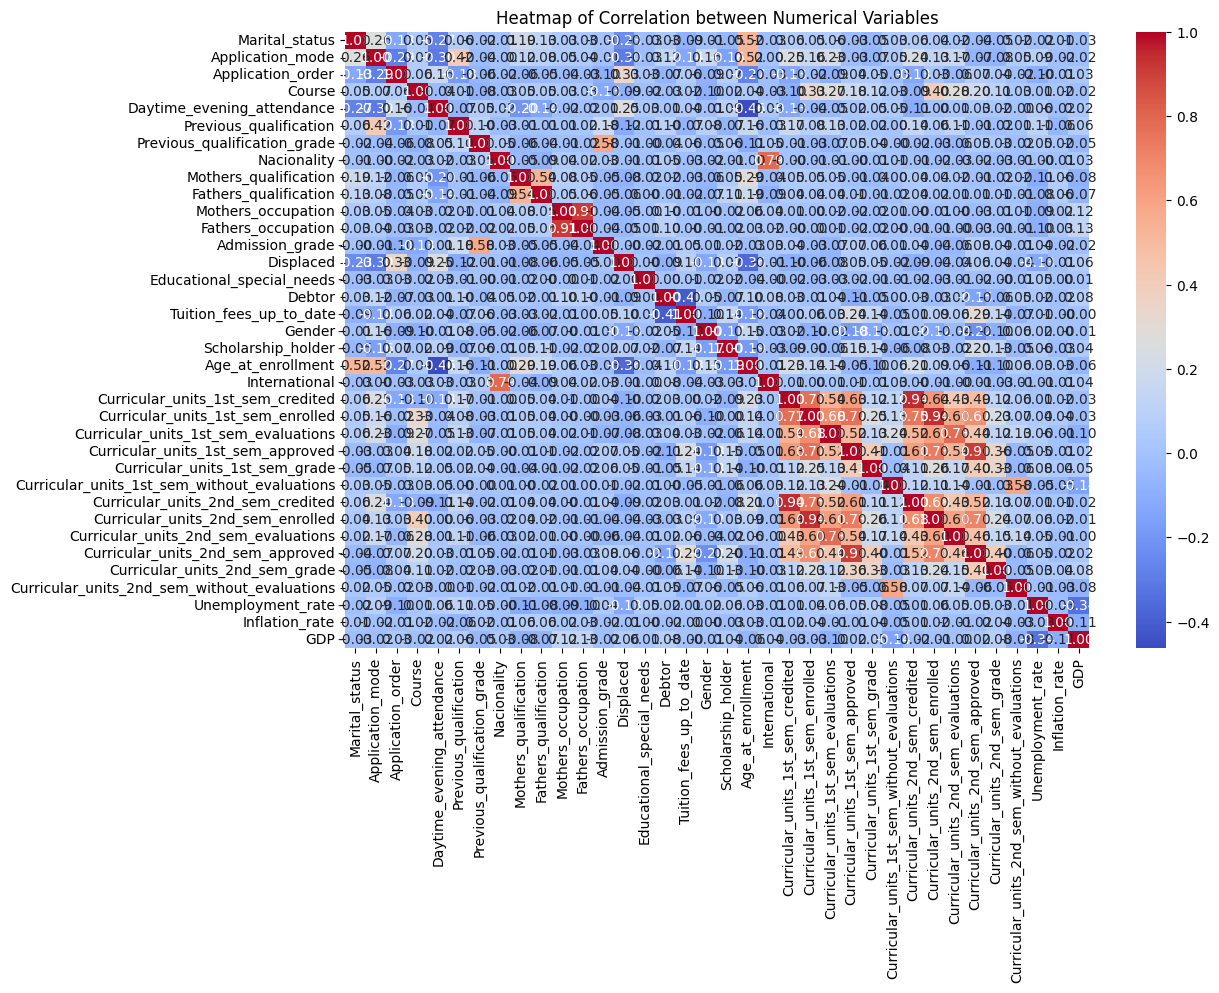

In [19]:
# Heatmap Visualization of Correlation Between Numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Correlation between Numerical Variables")
plt.show()

Heatmap ini memvisualisasikan koefisien korelasi Pearson antar variabel numerik. Warna merah solid menunjukkan korelasi positif kuat, biru solid menunjukkan korelasi negatif kuat, dan warna yang lebih pudar mengindikasikan korelasi yang lebih lemah.

*   **Korelasi Positif Kuat Signifikan:**
    *   Variabel-variabel unit kurikuler dalam satu semester (1st sem dan 2nd sem secara terpisah) sangat berkorelasi positif satu sama lain ( Seperti `Curricular_units_1st_sem_enrolled` dengan `Curricular_units_1st_sem_evaluations`, `Curricular_units_1st_sem_approved`).
    *   Terdapat korelasi positif kuat antara unit kurikuler yang disetujui di semester 1 dan semester 2 (`Curricular_units_1st_sem_approved` dengan `Curricular_units_2nd_sem_approved`).
    *   `Mothers_qualification` dan `Fathers_qualification` menunjukkan korelasi positif yang cukup kuat.
    *   `Age_at_enrollment` berkorelasi positif dengan `Marital_status` dan beberapa kategori `Application_mode`.
    *   `Scholarship_holder` berkorelasi positif dengan `Tuition_fees_up_to_date`.

*   **Korelasi Negatif Kuat Signifikan:**
    *   `Tuition_fees_up_to_date` memiliki korelasi negatif kuat dengan `Debtor`.

*   **Korelasi Rendah Umum:**
    *   Fitur-fitur seperti `Nacionality`, `Educational_special_needs`, dan indikator makroekonomi (`Unemployment_rate`, `Inflation_rate`, `GDP`) umumnya menunjukkan korelasi yang sangat rendah dengan sebagian besar fitur lainnya.

Analisis korelasi ini krusial untuk memahami hubungan antar fitur dan mengidentifikasi potensi multikolinearitas, yang penting untuk seleksi fitur dan pemilihan model.

## Data Preparation / Preprocessing

#### Missing Values pada `Status`

In [20]:
# Create cleaned dataframe
df_cleaned = df.copy()

# Check initial missing values
print("Initial check for missing values:")
print(f"Total rows: {len(df_cleaned)}")
print(f"Missing values in Status: {df_cleaned['Status'].isna().sum()}")

# Handle missing values in Status column
if df_cleaned['Status'].isna().any():
    # Option 1: Remove rows with missing Status (recommended since Status is the target variable)
    df_cleaned = df_cleaned.dropna(subset=['Status'])
    
    print("\nAfter cleaning:")
    print(f"Total rows: {len(df_cleaned)}")
    print(f"Missing values in Status: {df_cleaned['Status'].isna().sum()}")
    
    # Show value counts to verify distribution
    print("\nStatus distribution after cleaning:")
    print(df_cleaned['Status'].value_counts(normalize=True) * 100)
else:
    print("\nNo cleaning needed - Status column has no missing values")

# Verify data quality
print("\nFinal data quality check:")
print(f"Number of unique values in Status: {df_cleaned['Status'].nunique()}")
print("\nUnique values in Status:")
print(df_cleaned['Status'].unique())

Initial check for missing values:
Total rows: 4424
Missing values in Status: 0

No cleaning needed - Status column has no missing values

Final data quality check:
Number of unique values in Status: 3

Unique values in Status:
['Dropout' 'Graduate' 'Enrolled']


In [21]:
df_cleaned.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.00,1,19,12,...,0,0,0,0,0.00,0,10.80,1.40,1.74,Dropout
1,1,15,1,9254,1,1,160.00,1,1,3,...,0,6,6,6,13666666666666600.00,0,13.90,-0.30,0.79,Graduate
2,1,1,5,9070,1,1,122.00,1,37,37,...,0,6,0,0,0.00,0,10.80,1.40,1.74,Dropout
3,1,17,2,9773,1,1,122.00,1,38,37,...,0,6,10,5,12.40,0,9.40,-0.80,-3.12,Graduate
4,2,39,1,8014,0,1,100.00,1,37,38,...,0,6,6,6,13.00,0,13.90,-0.30,0.79,Graduate


#### Pengecekan & Membersihkan Outlier

In [22]:
# Create a function to view outliers report
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)

# Outliers details
columns_to_plot = df.describe().columns.tolist()
for i in df[columns_to_plot]:
  print(i,'\n', display(outliers(df[i])))

,sub,values
0,IQR,0.00
1,Upper Bound,1.00
2,Lower Bound,1.00
3,Sum outliers,505.00
4,percentage outliers,11.42


Marital_status 
 None


,sub,values
0,IQR,38.00
1,Upper Bound,96.00
2,Lower Bound,-56.00
3,Sum outliers,0.00
4,percentage outliers,0.00


Application_mode 
 None


,sub,values
0,IQR,1.00
1,Upper Bound,3.50
2,Lower Bound,-0.50
3,Sum outliers,541.00
4,percentage outliers,12.23


Application_order 
 None


,sub,values
0,IQR,471.00
1,Upper Bound,10262.50
2,Lower Bound,8378.50
3,Sum outliers,442.00
4,percentage outliers,9.99


Course 
 None


,sub,values
0,IQR,0.00
1,Upper Bound,1.00
2,Lower Bound,1.00
3,Sum outliers,483.00
4,percentage outliers,10.92


Daytime_evening_attendance 
 None


,sub,values
0,IQR,0.00
1,Upper Bound,1.00
2,Lower Bound,1.00
3,Sum outliers,707.00
4,percentage outliers,15.98


Previous_qualification 
 None


,sub,values
0,IQR,15.00
1,Upper Bound,162.50
2,Lower Bound,102.50
3,Sum outliers,179.00
4,percentage outliers,4.05


Previous_qualification_grade 
 None


,sub,values
0,IQR,0.00
1,Upper Bound,1.00
2,Lower Bound,1.00
3,Sum outliers,110.00
4,percentage outliers,2.49


Nacionality 
 None


,sub,values
0,IQR,35.00
1,Upper Bound,89.50
2,Lower Bound,-50.50
3,Sum outliers,0.00
4,percentage outliers,0.00


Mothers_qualification 
 None


,sub,values
0,IQR,34.00
1,Upper Bound,88.00
2,Lower Bound,-48.00
3,Sum outliers,0.00
4,percentage outliers,0.00


Fathers_qualification 
 None


,sub,values
0,IQR,5.00
1,Upper Bound,16.50
2,Lower Bound,-3.50
3,Sum outliers,182.00
4,percentage outliers,4.11


Mothers_occupation 
 None


,sub,values
0,IQR,5.00
1,Upper Bound,16.50
2,Lower Bound,-3.50
3,Sum outliers,177.00
4,percentage outliers,4.00


Fathers_occupation 
 None


,sub,values
0,IQR,16.90
1,Upper Bound,160.15
2,Lower Bound,92.55
3,Sum outliers,86.00
4,percentage outliers,1.94


Admission_grade 
 None


,sub,values
0,IQR,1.00
1,Upper Bound,2.50
2,Lower Bound,-1.50
3,Sum outliers,0.00
4,percentage outliers,0.00


Displaced 
 None


,sub,values
0,IQR,0.00
1,Upper Bound,0.00
2,Lower Bound,0.00
3,Sum outliers,51.00
4,percentage outliers,1.15


Educational_special_needs 
 None


,sub,values
0,IQR,0.00
1,Upper Bound,0.00
2,Lower Bound,0.00
3,Sum outliers,503.00
4,percentage outliers,11.37


Debtor 
 None


,sub,values
0,IQR,0.00
1,Upper Bound,1.00
2,Lower Bound,1.00
3,Sum outliers,528.00
4,percentage outliers,11.93


Tuition_fees_up_to_date 
 None


,sub,values
0,IQR,1.00
1,Upper Bound,2.50
2,Lower Bound,-1.50
3,Sum outliers,0.00
4,percentage outliers,0.00


Gender 
 None


,sub,values
0,IQR,0.00
1,Upper Bound,0.00
2,Lower Bound,0.00
3,Sum outliers,1099.00
4,percentage outliers,24.84


Scholarship_holder 
 None


,sub,values
0,IQR,6.00
1,Upper Bound,34.00
2,Lower Bound,10.00
3,Sum outliers,441.00
4,percentage outliers,9.97


Age_at_enrollment 
 None


,sub,values
0,IQR,0.00
1,Upper Bound,0.00
2,Lower Bound,0.00
3,Sum outliers,110.00
4,percentage outliers,2.49


International 
 None


,sub,values
0,IQR,0.00
1,Upper Bound,0.00
2,Lower Bound,0.00
3,Sum outliers,577.00
4,percentage outliers,13.04


Curricular_units_1st_sem_credited 
 None


,sub,values
0,IQR,2.00
1,Upper Bound,10.00
2,Lower Bound,2.00
3,Sum outliers,424.00
4,percentage outliers,9.58


Curricular_units_1st_sem_enrolled 
 None


,sub,values
0,IQR,4.00
1,Upper Bound,16.00
2,Lower Bound,0.00
3,Sum outliers,158.00
4,percentage outliers,3.57


Curricular_units_1st_sem_evaluations 
 None


,sub,values
0,IQR,3.00
1,Upper Bound,10.50
2,Lower Bound,-1.50
3,Sum outliers,180.00
4,percentage outliers,4.07


Curricular_units_1st_sem_approved 
 None


,sub,values
0,IQR,12166666666666588.00
1,Upper Bound,30416666666666480.00
2,Lower Bound,-18249999999999868.00
3,Sum outliers,0.00
4,percentage outliers,0.00


Curricular_units_1st_sem_grade 
 None


,sub,values
0,IQR,0.00
1,Upper Bound,0.00
2,Lower Bound,0.00
3,Sum outliers,294.00
4,percentage outliers,6.65


Curricular_units_1st_sem_without_evaluations 
 None


,sub,values
0,IQR,0.00
1,Upper Bound,0.00
2,Lower Bound,0.00
3,Sum outliers,530.00
4,percentage outliers,11.98


Curricular_units_2nd_sem_credited 
 None


,sub,values
0,IQR,2.00
1,Upper Bound,10.00
2,Lower Bound,2.00
3,Sum outliers,369.00
4,percentage outliers,8.34


Curricular_units_2nd_sem_enrolled 
 None


,sub,values
0,IQR,4.00
1,Upper Bound,16.00
2,Lower Bound,0.00
3,Sum outliers,109.00
4,percentage outliers,2.46


Curricular_units_2nd_sem_evaluations 
 None


,sub,values
0,IQR,4.00
1,Upper Bound,12.00
2,Lower Bound,-4.00
3,Sum outliers,44.00
4,percentage outliers,0.99


Curricular_units_2nd_sem_approved 
 None


,sub,values
0,IQR,11666666666666588.00
1,Upper Bound,29166666666666480.00
2,Lower Bound,-17499999999999872.00
3,Sum outliers,0.00
4,percentage outliers,0.00


Curricular_units_2nd_sem_grade 
 None


,sub,values
0,IQR,0.00
1,Upper Bound,0.00
2,Lower Bound,0.00
3,Sum outliers,282.00
4,percentage outliers,6.37


Curricular_units_2nd_sem_without_evaluations 
 None


,sub,values
0,IQR,4.50
1,Upper Bound,20.65
2,Lower Bound,2.65
3,Sum outliers,0.00
4,percentage outliers,0.00


Unemployment_rate 
 None


,sub,values
0,IQR,2.30
1,Upper Bound,6.05
2,Lower Bound,-3.15
3,Sum outliers,0.00
4,percentage outliers,0.00


Inflation_rate 
 None


,sub,values
0,IQR,3.49
1,Upper Bound,7.03
2,Lower Bound,-6.94
3,Sum outliers,0.00
4,percentage outliers,0.00


GDP 
 None


In [23]:
# Function to remove negative values in specified columns (except economic indicators)
def handle_outliers(df, cols_to_check, exempt_cols):
    initial_rows = len(df)
    cleaned_df = df.copy()
    removal_stats = {}

    for col in cols_to_check:
        if col in exempt_cols:
            print(f"⚠️ Skipping outlier removal for {col} (can be negative)")
            continue
            
        neg_count = (cleaned_df[col] < 0).sum()
        if neg_count > 0:
            cleaned_df = cleaned_df[cleaned_df[col] >= 0]
            removal_stats[col] = neg_count

    print(f"\nOutlier Removal Summary:")
    print(f"Initial rows: {initial_rows}")
    print(f"Final rows: {len(cleaned_df)}")
    print(f"Total removed: {initial_rows - len(cleaned_df)}")
    print("\nNegative values removed per column:")
    for col, count in removal_stats.items():
        print(f"{col}: {count} row(s)")

    return cleaned_df, removal_stats


# Get all numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define columns that can have negative values (economic indicators)
exempt_cols = ['Unemployment_rate', 'Inflation_rate', 'GDP']

# Apply function to remove negative outliers from other numerical columns
df_cleaned, neg_stats = handle_outliers(df, numerical_cols, exempt_cols)

# Verify min/max values after cleaning
print("\nValue ranges after cleaning:")
for col in numerical_cols:
    if col in exempt_cols:
        print(f"{col} | Min: {df_cleaned[col].min():.2f} | Max: {df_cleaned[col].max():.2f} ⬅️ [Exempt]")
    else:
        print(f"{col} | Min: {df_cleaned[col].min():.2f} | Max: {df_cleaned[col].max():.2f}")

⚠️ Skipping outlier removal for Unemployment_rate (can be negative)
⚠️ Skipping outlier removal for Inflation_rate (can be negative)
⚠️ Skipping outlier removal for GDP (can be negative)

Outlier Removal Summary:
Initial rows: 4424
Final rows: 4424
Total removed: 0

Negative values removed per column:

Value ranges after cleaning:
Marital_status | Min: 1.00 | Max: 6.00
Application_mode | Min: 1.00 | Max: 57.00
Application_order | Min: 0.00 | Max: 9.00
Course | Min: 33.00 | Max: 9991.00
Daytime_evening_attendance | Min: 0.00 | Max: 1.00
Previous_qualification | Min: 1.00 | Max: 43.00
Previous_qualification_grade | Min: 95.00 | Max: 190.00
Nacionality | Min: 1.00 | Max: 109.00
Mothers_qualification | Min: 1.00 | Max: 44.00
Fathers_qualification | Min: 1.00 | Max: 44.00
Mothers_occupation | Min: 0.00 | Max: 194.00
Fathers_occupation | Min: 0.00 | Max: 195.00
Admission_grade | Min: 95.00 | Max: 190.00
Displaced | Min: 0.00 | Max: 1.00
Educational_special_needs | Min: 0.00 | Max: 1.00
Debto

#### Memilih fitur berdasarkan `Feature Correlation with Status`

In [24]:
# Check unique values in Status column
print("Unique values in Status:", df['Status'].unique())

# Convert Status to numeric
status_map = {'Dropout': 0, 'Graduate': 1, 'Enrolled': 2} 
df['Status_Encode'] = df['Status'].map(status_map)

Unique values in Status: ['Dropout' 'Graduate' 'Enrolled']


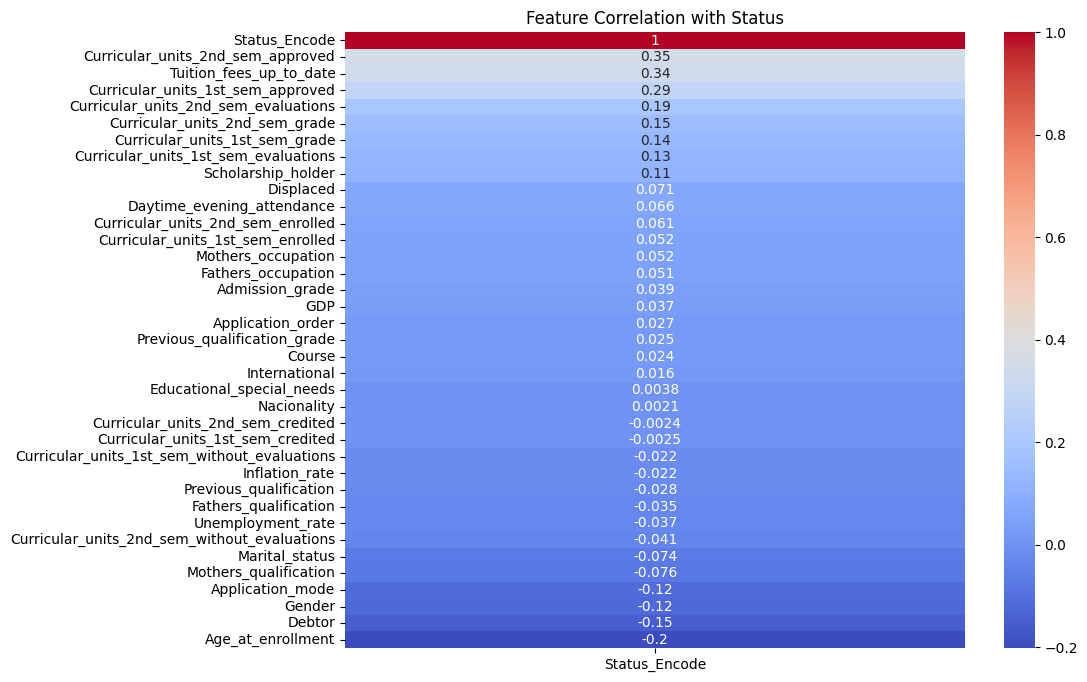

In [25]:
# Calculate correlation with numeric Status
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Visualize correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Status_Encode']].sort_values(by='Status_Encode', ascending=False), 
            annot=True, 
            cmap="coolwarm")
plt.title("Feature Correlation with Status")
plt.show()

# Optional: Remove temporary Encode column if needed
df = df.drop('Status_Encode', axis=1)

Heatmap ini menampilkan korelasi Pearson antara setiap fitur numerik dengan variabel target `Status_Encode` (yang merepresentasikan status akademik mahasiswa, dengan nilai lebih tinggi mengindikasikan status yang lebih baik seperti 'Graduate'). Fitur diurutkan berdasarkan kekuatan korelasi.

*   **Korelasi Positif Terkuat dengan `Status_Encode` (mengindikasikan kecenderungan ke arah 'Graduate'):**
    *   `Curricular_units_2nd_sem_approved` (0.35)
    *   `Tuition_fees_up_to_date` (0.34)
    *   `Curricular_units_1st_sem_approved` (0.29)
    *   Nilai unit kurikuler lainnya (evaluasi, nilai akhir semester 1 & 2) dan status `Scholarship_holder` (0.11) juga menunjukkan korelasi positif yang relevan.

*   **Korelasi Negatif Terkuat dengan `Status_Encode` (mengindikasikan kecenderungan ke arah 'Dropout'):**
    *   `Age_at_enrollment` (-0.20)
    *   `Debtor` (-0.15)
    *   `Gender` (-0.12) (Menunjukkan mahasiswa laki-laki (kode 1) berkorelasi negatif dengan status akademik yang lebih baik, atau perempuan (kode 0) berkorelasi positif)
    *   `Application_mode` (-0.12)

Fitur-fitur dengan korelasi absolut tertinggi (baik positif maupun negatif) adalah prediktor kunci untuk status akademik mahasiswa. Banyak fitur lain menunjukkan korelasi yang sangat lemah dengan `Status_Encode`.

#### Menentukan `X` & `y`

In [26]:
# Convert Status to numeric using map
status_map = {'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}
df_cleaned['Status_Encode'] = df_cleaned['Status'].replace(status_map)

# Define features and target
X = df_cleaned.drop(columns=['Status', 'Status_Encode'])  # Ensure both are removed
y = df_cleaned['Status_Encode']

#### Menentukan fitur dengan `SelectKBest`

In [27]:
# Select top 20 features using SelectKBest
selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X, y)

# Get feature scores and names
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

# Get top 20 features
selected_features = feature_scores.head(20)['Feature'].tolist()

# Print results
print("\nTop 20 Selected Features by F-Score:")
for idx, row in feature_scores.head(20).iterrows():
    print(f"- {row['Feature']}: {row['Score']:.3f}")

print(f"\nTotal selected features: {len(selected_features)}")

# Define final X and y using selected features
X_final = df_cleaned[selected_features]
y_final = df_cleaned['Status_Encode']

print("\nFeature Split:")
print(f"Number of features (X): {X_final.shape[1]}")
print(f"Target variable (y) unique values: {y_final.unique()}")


Top 20 Selected Features by F-Score:
- Curricular_units_2nd_sem_approved: 1410.733
- Curricular_units_1st_sem_approved: 859.867
- Tuition_fees_up_to_date: 505.621
- Curricular_units_1st_sem_grade: 242.444
- Curricular_units_2nd_sem_grade: 232.200
- Scholarship_holder: 225.751
- Age_at_enrollment: 154.712
- Debtor: 137.648
- Gender: 123.042
- Application_mode: 114.535
- Curricular_units_2nd_sem_evaluations: 87.801
- Curricular_units_2nd_sem_enrolled: 75.592
- Curricular_units_1st_sem_enrolled: 59.467
- Curricular_units_1st_sem_evaluations: 37.528
- Admission_grade: 35.649
- Displaced: 29.239
- Previous_qualification_grade: 27.729
- Curricular_units_2nd_sem_without_evaluations: 20.186
- Marital_status: 19.832
- Application_order: 19.727

Total selected features: 20

Feature Split:
Number of features (X): 20
Target variable (y) unique values: [0 1 2]


Pada pemilihan fitur ini di implementasikan seleksi fitur menggunakan `SelectKBest` untuk memilih 20 fitur teratas berdasarkan skor F-statistik (ANOVA).

*   **Fitur Terpilih:** Output mencantumkan 20 fitur teratas yang dipilih. `Curricular_units_2nd_sem_approved` (skor 1410.733), `Curricular_units_1st_sem_approved` (skor 859.867), dan `Tuition_fees_up_to_date` (skor 505.621) adalah tiga fitur dengan skor tertinggi, menunjukkan pengaruh paling signifikan terhadap variabel target.
*   **Pola Fitur:** Fitur-fitur yang terkait dengan performa akademik (jumlah unit kurikuler yang disetujui, nilai) dan status finansial mahasiswa (biaya kuliah, status debitur) secara konsisten mendominasi peringkat teratas.
*   **Konfigurasi Akhir:** Himpunan fitur `X_final` dikonfirmasi menggunakan 20 fitur terpilih ini. Variabel target `y_final` memiliki tiga kelas unik: [0, 1, 2], yang siap digunakan untuk melatih model klasifikasi.

Total 20 fitur dipilih untuk membangun model prediktif.
```_fees_up_to_date` (505.621) adalah tiga fitur dengan skor F-statistik tertinggi, menunjukkan kontribusi prediktif paling signifikan terhadap status mahasiswa.
    *   Fitur-fitur lain seperti `Scholarship_holder`, `Age_at_enrollment`, `Debtor`, dan `Gender` juga termasuk dalam 20 besar dengan skor yang substansial.

*   **Pembentukan Data Final:**
    *   `X_final` dibentuk hanya menggunakan 20 fitur terpilih ini.
    *   `y_final` (target `Status_Encode`) dikonfirmasi memiliki 3 nilai unik: [0, 1, 2], yang merepresentasikan 'Dropout', 'Graduate', dan 'Enrolled'.

#### Split data 80:20

In [28]:
# Split data before any preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTrain-test split completed:")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")


Train-test split completed:
Training samples: 3539
Test samples: 885


#### Min-max Scaler pada `X`

In [29]:
# Define categorical columns that are stored as numeric (based on your data description)
categorical_numeric = [
    'Marital_status',                  # Multi-class Categorical
    'Application_mode',                # Multi-class Categorical
    'Application_order',               # Ordinal Categorical (0 = first choice; 9 = last choice)
    'Course',                          # Multi-class Categorical
    'Daytime_evening_attendance',      # Binary Categorical (1/0)
    'Previous_qualification',          # Multi-class Categorical
    'Nacionality',                     # Multi-class Categorical
    'Mothers_qualification',           # Multi-class Categorical
    'Fathers_qualification',           # Multi-class Categorical
    'Mothers_occupation',              # Multi-class Categorical
    'Fathers_occupation',              # Multi-class Categorical
    'Displaced',                        # Binary Categorical (1/0)
    'Educational_special_needs',       # Binary Categorical (1/0)
    'Debtor',                           # Binary Categorical (1/0)
    'Tuition_fees_up_to_date',         # Binary Categorical (1/0)
    'Gender',                           # Binary Categorical (1 = male, 0 = female)
    'Scholarship_holder',              # Binary Categorical (1 = yes, 0 = no)
    'International',                   # Binary Categorical (1 = international, 0 = local)
]

# Get numerical features (excluding encoded and known categorical numeric)
numerical_features = [
    col for col in X.select_dtypes(include=['int64', 'float64']).columns
    if not col.endswith('_Encode') and col not in categorical_numeric
]

# Optional: Check if all defined categorical columns exist in DataFrame
missing_categorical = [col for col in categorical_numeric if col not in X.columns]
if missing_categorical:
    print("⚠️ Kolom berikut tidak ditemukan di DataFrame:", missing_categorical)
else:
    print("✅ Semua kolom kategorikal tersedia")

# Print hasil identifikasi
print("\nFeatures identified:")
print("Numerical features:", numerical_features)
print("Categorical features:", categorical_numeric)
print(f"Total numerical features: {len(numerical_features)}")
print(f"Total categorical features: {len(categorical_numeric)}")

✅ Semua kolom kategorikal tersedia

Features identified:
Numerical features: ['Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP']
Categorical features: ['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'G

In [30]:
def apply_scaling(X_train, X_test):
    """
    Apply StandardScaler to numerical features
    """
    # Initialize scaler
    scaler = StandardScaler()
    
    # Create copies to avoid modifying originals
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    
    # Scale only numerical features
    if len(numerical_features) > 0:
        X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
        X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])
        
        # Verify scaling worked
        print("\nScaling verification:")
        print(f"Original mean of first numerical feature: {X_train[numerical_features[0]].mean():.2f}")
        print(f"Scaled mean of first numerical feature: {X_train_scaled[numerical_features[0]].mean():.2f}")
    
    return X_train_scaled, X_test_scaled, scaler

# Apply scaling
X_train_scaled, X_test_scaled, scaler = apply_scaling(X_train, X_test)

# Update final training and test sets
X_train_final = X_train_scaled
X_test_final = X_test_scaled

print("\nScaling completed:")
print(f"Training set shape: {X_train_final.shape}")
print(f"Test set shape: {X_test_final.shape}")


Scaling verification:
Original mean of first numerical feature: 132.64
Scaled mean of first numerical feature: -0.00

Scaling completed:
Training set shape: (3539, 36)
Test set shape: (885, 36)


#### Menerapkan SMOTE agar seimbang

In [31]:
# Apply SMOTE on scaled training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

print("\nAfter SMOTE:")
print("Original training set shape:", X_train_scaled.shape)
print("Resampled training set shape:", X_resampled.shape)
print("Resampled target shape:", y_resampled.shape)


After SMOTE:
Original training set shape: (3539, 36)
Resampled training set shape: (5301, 36)
Resampled target shape: (5301,)


In [32]:
# Update final training set with resampled data
X_train_final = X_resampled
y_train_final = y_resampled

# Keep test set as is
X_test_final = X_test_scaled 
y_test_final = y_test

print("\nFinal datasets:")
print(f"Training samples: {len(X_train_final)}")
print(f"Test samples: {len(X_test_final)}")
print(f"Features: {X_train_final.shape[1]}")


Final datasets:
Training samples: 5301
Test samples: 885
Features: 36


## Modeling

In [33]:
# Initialize and fit LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True)
# Model evaluation with properly scaled features
models, predictions = clf.fit(X_train_final, X_test_final, 
                            y_train_final, y_test_final)

# Show top 10 models by Accuracy
print("\nTop 10 Models by Accuracy:")
print(models.sort_values(by="Accuracy", ascending=False).head(10))

  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4771
[LightGBM] [Info] Number of data points in the train set: 5301, number of used features: 36
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612

Top 10 Models by Accuracy:
                        Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                   
LGBMClassifier              0.76               0.69    None      0.76   
XGBClassifier               0.76               0.68    None      0.75   
RandomForestClassifier      0.76               0.69    None      0.76   
ExtraTreesClassifier        0.75               0.68    None      0.75   
SVC                 

Evaluasi 10 model teratas berdasarkan akurasi menunjukkan:
*   **Performa Teratas:** LGBMClassifier, XGBClassifier, dan RandomForestClassifier memimpin dengan Akurasi 0.76. LGBMClassifier dan RandomForestClassifier juga mencapai Balanced Accuracy tertinggi (0.69) dan F1 Score 0.76.

LGBMClassifier, XGBClassifier, RandomForestClassifier, dan ExtratreesClassifier menunjukkan kombinasi terbaik dari akurasi, balanced accuracy, dan F1-score. Berdasarkan hasil ini, model RandomForestClassifier, LGBMClassifier, XGBClassifier, dan ExtraTreesClassifier akan dilanjutkan untuk evaluasi dan seleksi lebih lanjut.

## Evaluation

#### KFold Cross-Validation

In [34]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Mute warnings and logs from LightGBM
warnings.filterwarnings("ignore")
os.environ['LIGHTGBM_DISABLE_LOGGING'] = '1'
logging.getLogger('lightgbm').setLevel(logging.WARNING)

# Define models including ExtraTrees
models = {
    'RandomForest': RandomForestClassifier(),
    'LGBM': LGBMClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'ExtraTrees': ExtraTreesClassifier(random_state=42) 
}

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Print header
print(f"{'Model':<12} | {'Accuracy':<9} ± STD     {'Precision':<9} ± STD     {'Recall':<8} ± STD     {'F1-Score':<9} ± STD")

# Evaluate each model with cross-validation
for name, model in models.items():
    # Calculate scores with proper averaging
    acc = cross_val_score(model, X_train_final, y_train_final, cv=cv, scoring='accuracy')
    prec = cross_val_score(model, X_train_final, y_train_final, cv=cv, scoring=scoring['precision'])
    rec = cross_val_score(model, X_train_final, y_train_final, cv=cv, scoring=scoring['recall'])
    f1 = cross_val_score(model, X_train_final, y_train_final, cv=cv, scoring=scoring['f1'])
    
    # Print results
    print(f"{name:<12} | {acc.mean():.4f} ± {acc.std():.4f}   {prec.mean():.4f} ± {prec.std():.4f}   {rec.mean():.4f} ± {rec.std():.4f}   {f1.mean():.4f} ± {f1.std():.4f}")

Model        | Accuracy  ± STD     Precision ± STD     Recall   ± STD     F1-Score  ± STD
RandomForest | 0.8415 ± 0.0111   0.8483 ± 0.0109   0.8447 ± 0.0125   0.8440 ± 0.0110
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4262
[LightGBM] [Info] Number of data points in the train set: 4240, number of used features: 36
[LightGBM] [Info] Start training from score -1.098141
[LightGBM] [Info] Start training from score -1.098848
[LightGBM] [Info] Start training from score -1.098848
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4260
[LightGBM] [Info] Number of data points in the train set: 4241, number of used features: 36
[LightGBM] [Info] Start

Evaluasi cross-validation untuk empat model teratas menghasilkan performa rata-rata berikut:

| Model        | Accuracy        | Precision       | Recall          | F1-Score        |
|--------------|-----------------|-----------------|-----------------|-----------------|
| RandomForest | 0.8389 ± 0.0144 | 0.8472 ± 0.0154 | 0.8434 ± 0.0102 | 0.8417 ± 0.0101 |
| LGBM         | 0.8457 ± 0.0122 | 0.8475 ± 0.0124 | 0.8457 ± 0.0122 | 0.8456 ± 0.0122 |
| XGBoost      | 0.8463 ± 0.0153 | 0.8481 ± 0.0157 | 0.8463 ± 0.0153 | 0.8461 ± 0.0154 |
| ExtraTrees   | **0.8504 ± 0.0085** | **0.8529 ± 0.0089** | **0.8504 ± 0.0085** | **0.8505 ± 0.0086** |

**Kesimpulan dan Langkah Selanjutnya:**
Model **ExtraTreesClassifier** saat ini menunjukkan performa terbaik dengan parameter default, unggul di semua metrik dan memiliki stabilitas yang baik (standar deviasi rendah).

Meskipun demikian, model **LGBM, XGBoost, dan RandomForest** akan dioptimalkan lebih lanjut melalui penyetelan hyperparameter. Alasannya, model-model ini memiliki performa awal yang sangat kompetitif dan berpotensi signifikan untuk peningkatan kinerja setelah tuning, sehingga dapat melampaui ExtraTrees. Tujuannya adalah untuk memastikan model dengan performa absolut terbaik dipilih setelah eksplorasi optimasi yang komprehensif.

#### Hyperparameter tuning dengan `Optuna`

In [35]:
# Create study to maximize F1-Score
study = optuna.create_study(direction='maximize')

# Objective function for ExtraTrees optimization
def objective(trial):
    # Define hyperparameter search space
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_float('max_features', 0.6, 1.0),
        'random_state': 42
    }
    
    # Initialize model
    model = ExtraTreesClassifier(**params)
    
    try:
        # Evaluate using cross-validation
        scores = cross_val_score(
            model,
            X_train_final,
            y_train_final,
            cv=5,
            scoring='f1_weighted',
            n_jobs=-1
        )
        return scores.mean()
    except Exception:
        return float('-inf')

try:
    # Run optimization
    study.optimize(objective, n_trials=50, catch=(Exception,))
    
    # Train final model with best parameters
    best_model = ExtraTreesClassifier(**study.best_params)
    best_model.fit(X_train_final, y_train_final)
    
    # Evaluate model
    y_pred = best_model.predict(X_test_final)
    print("\nBest Parameters:", study.best_params)
    print("\nModel Performance:")
    print("Test Accuracy:", accuracy_score(y_test_final, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test_final, y_pred))

except Exception as e:
    print("Error:", str(e))

[I 2025-05-25 20:39:03,105] A new study created in memory with name: no-name-7df2b541-5ea3-4938-a9f3-d0a0e3330b9b
[I 2025-05-25 20:39:10,109] Trial 0 finished with value: 0.7151032661348513 and parameters: {'n_estimators': 264, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 0.8866810276687517}. Best is trial 0 with value: 0.7151032661348513.
[I 2025-05-25 20:39:21,710] Trial 1 finished with value: 0.8050441736717302 and parameters: {'n_estimators': 413, 'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 0.8080713139299895}. Best is trial 1 with value: 0.8050441736717302.
[I 2025-05-25 20:39:35,362] Trial 2 finished with value: 0.812276842658911 and parameters: {'n_estimators': 441, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 0.9893162620006883}. Best is trial 2 with value: 0.812276842658911.
[I 2025-05-25 20:39:43,786] Trial 3 finished with value: 0.7894122232590576 and parameters: {'n_esti


Best Parameters: {'n_estimators': 213, 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 0.7555377211837871}

Model Performance:
Test Accuracy: 0.7548022598870057

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       284
           1       0.82      0.88      0.85       442
           2       0.46      0.50      0.48       159

    accuracy                           0.75       885
   macro avg       0.71      0.69      0.70       885
weighted avg       0.76      0.75      0.75       885



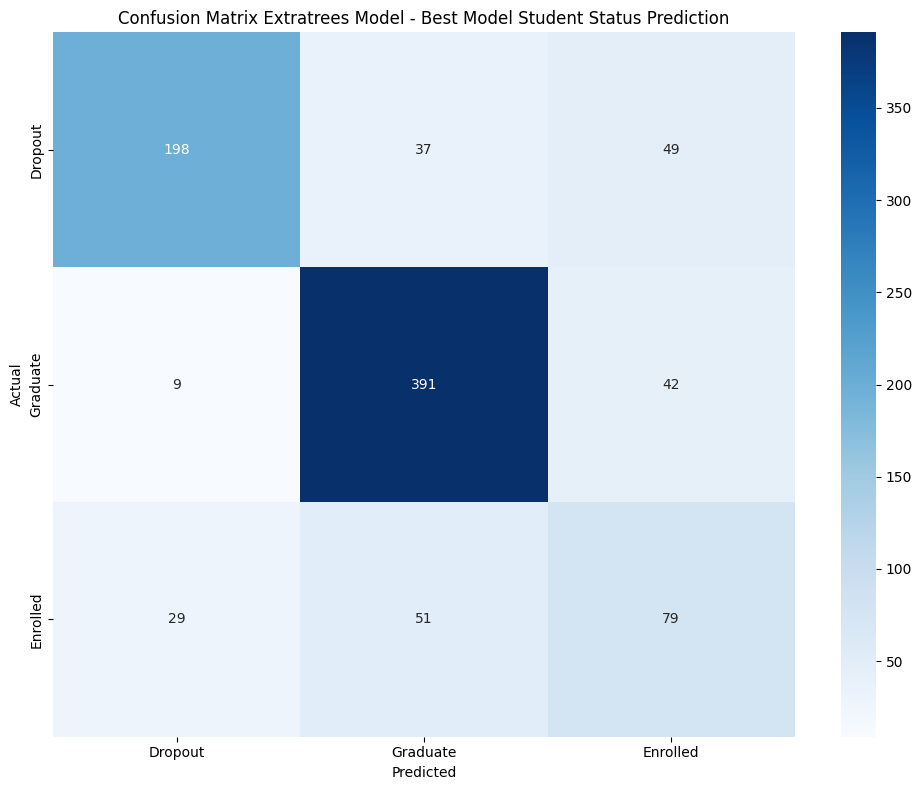

In [36]:
# Make predictions and create confusion matrix
y_pred = best_model.predict(X_test_final)
cm = confusion_matrix(y_test_final, y_pred)

# Define the status labels in order 
status_labels = ['Dropout', 'Graduate', 'Enrolled']

# Create confusion matrix visualization 
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=status_labels,
    yticklabels=status_labels
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Extratrees Model - Best Model Student Status Prediction')
plt.tight_layout()
plt.show()

Model ExtraTrees yang telah dioptimalkan dengan hyperparameter terbaik (`n_estimators`: 213, `max_depth`: 15, `min_samples_split`: 7, dll.) mencapai akurasi tes sebesar 0.7548 (atau 75.48%). Confusion matrix dan classification report menunjukkan performa klasifikasi status mahasiswa sebagai berikut:

*   **Graduate (Kelas 1):** Diprediksi dengan sangat baik. Model mengidentifikasi 391 dari 442 mahasiswa Graduate (recall 0.88), menghasilkan F1-score tertinggi (0.85). Kesalahan klasifikasi minimal (9 salah sebagai Dropout, 42 sebagai Enrolled).
*   **Dropout (Kelas 0):** Diprediksi dengan baik. Model mengidentifikasi 198 dari 284 mahasiswa Dropout (recall 0.70), dengan F1-score 0.76. Kesalahan utama adalah prediksi keliru sebagai Enrolled (49) dan Graduate (37).
*   **Enrolled (Kelas 2):** Kelas dengan prediksi paling menantang. Model mengidentifikasi 79 dari 159 mahasiswa Enrolled (recall 0.50), menghasilkan F1-score 0.48. Sering salah diklasifikasikan sebagai Graduate (51) dan Dropout (29).

Akurasi keseluruhan model adalah 0.75. Model ini unggul dalam mengidentifikasi 'Graduate', cukup baik untuk 'Dropout', dan menunjukkan kelemahan dalam memprediksi 'Enrolled'.

In [37]:
# Create study to maximize F1-Score
study = optuna.create_study(direction='maximize')

# Objective function for XGBoost optimization
def objective(trial):
    # Define hyperparameter search space
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'mlogloss'  # For multi-class classification
    }
    
    # Initialize model
    model = XGBClassifier(**params)
    
    try:
        # Evaluate using cross-validation
        scores = cross_val_score(
            model,
            X_train_final,
            y_train_final,
            cv=5,
            scoring='f1_weighted',
            n_jobs=-1
        )
        return scores.mean()
    except Exception:
        return float('-inf')

try:
    # Run optimization
    study.optimize(objective, n_trials=50, catch=(Exception,))
    
    # Train final model with best parameters
    best_params = study.best_params
    best_params.update({'use_label_encoder': False, 'eval_metric': 'mlogloss'})
    best_model_xgboost = XGBClassifier(**best_params)  
    
    # Fit without early stopping
    best_model_xgboost.fit(X_train_final, y_train_final)
    
    # Evaluate model
    y_pred = best_model_xgboost.predict(X_test_final)
    
    print("\nBest Parameters:", study.best_params)
    print("\nModel Performance:")
    print("Test Accuracy:", accuracy_score(y_test_final, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test_final, y_pred))

except Exception as e:
    print("Error:", str(e))

[I 2025-05-25 20:43:48,034] A new study created in memory with name: no-name-9f7d9df5-67d7-4214-9bd3-38d7b4f1418c
[I 2025-05-25 20:43:55,215] Trial 0 finished with value: 0.8393478902394651 and parameters: {'n_estimators': 469, 'learning_rate': 0.04226747247808944, 'max_depth': 7, 'min_child_weight': 4, 'subsample': 0.6637515006128657, 'colsample_bytree': 0.9462168294306256}. Best is trial 0 with value: 0.8393478902394651.
[I 2025-05-25 20:43:58,208] Trial 1 finished with value: 0.8292700111810575 and parameters: {'n_estimators': 131, 'learning_rate': 0.05249392517537279, 'max_depth': 7, 'min_child_weight': 2, 'subsample': 0.8501886793058433, 'colsample_bytree': 0.9861254163514063}. Best is trial 0 with value: 0.8393478902394651.
[I 2025-05-25 20:44:06,191] Trial 2 finished with value: 0.8373758287803692 and parameters: {'n_estimators': 499, 'learning_rate': 0.09172746473043837, 'max_depth': 10, 'min_child_weight': 4, 'subsample': 0.8859566722726495, 'colsample_bytree': 0.9889984787631


Best Parameters: {'n_estimators': 427, 'learning_rate': 0.03569996512550742, 'max_depth': 13, 'min_child_weight': 1, 'subsample': 0.7596072675762532, 'colsample_bytree': 0.8474088532036648}

Model Performance:
Test Accuracy: 0.7672316384180791

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       284
           1       0.80      0.93      0.86       442
           2       0.50      0.42      0.45       159

    accuracy                           0.77       885
   macro avg       0.71      0.69      0.70       885
weighted avg       0.76      0.77      0.76       885



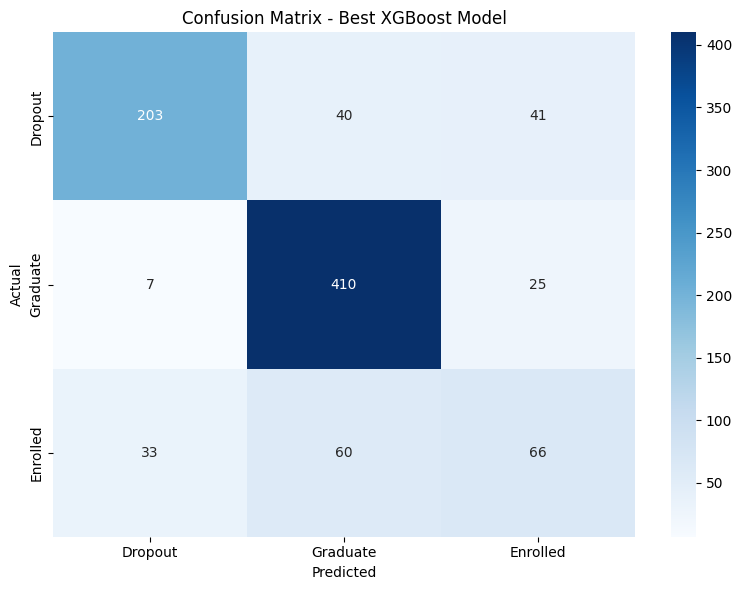

In [38]:
# Get predictions and compute confusion matrix
y_pred = best_model_xgboost.predict(X_test_final)
cm = confusion_matrix(y_test_final, y_pred)

# Define class labels
status_labels = ['Dropout', 'Graduate', 'Enrolled']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=status_labels,
    yticklabels=status_labels
)
plt.title('Confusion Matrix - Best XGBoost Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

Confusion matrix dan classification report untuk model XGBoost yang telah dioptimalkan dengan hyperparameter terbaik (`n_estimators`: 427, `learning_rate`: 0.036, `max_depth`: 13, dll.) menunjukkan performa klasifikasi status mahasiswa sebagai berikut:

*   **Graduate (Kelas 1):** Diprediksi dengan akurasi sangat tinggi. Model mengidentifikasi 410 dari 442 mahasiswa Graduate (recall 0.93), menghasilkan F1-score tertinggi (0.86). Kesalahan klasifikasi minimal (7 salah sebagai Dropout, 25 sebagai Enrolled).
*   **Dropout (Kelas 0):** Diprediksi dengan baik. Model mengidentifikasi 203 dari 284 mahasiswa Dropout (recall 0.71), dengan F1-score 0.77. Kesalahan utama adalah prediksi keliru sebagai Graduate (40) dan Enrolled (41).
*   **Enrolled (Kelas 2):** Kelas dengan prediksi paling menantang. Model mengidentifikasi 66 dari 159 mahasiswa Enrolled (recall 0.42), menghasilkan F1-score 0.45. Sering salah diklasifikasikan sebagai Graduate (60) dan Dropout (33).

Akurasi keseluruhan model XGBoost setelah tuning adalah 0.77 (atau 76.72%). Model ini sangat unggul dalam mengidentifikasi 'Graduate', cukup baik untuk 'Dropout', dan tetap menunjukkan kelemahan dalam memprediksi 'Enrolled', meskipun ada sedikit peningkatan recall untuk 'Graduate' dibandingkan evaluasi sebelumnya.

In [39]:
# Create study to maximize F1-Score
study = optuna.create_study(direction='maximize')

# Objective function for RandomForest optimization
def objective(trial):
    # Define hyperparameter search space
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_float('max_features', 0.6, 1.0),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'random_state': 42,
        'n_jobs': -1
    }
    
    # Initialize model
    model = RandomForestClassifier(**params)
    
    try:
        # Evaluate using cross-validation
        scores = cross_val_score(
            model,
            X_train_final,
            y_train_final,
            cv=5,
            scoring='f1_weighted',
            n_jobs=-1
        )
        return scores.mean()
    except Exception:
        return float('-inf')

try:
    # Run optimization
    study.optimize(objective, n_trials=50, catch=(Exception,))
    
    # Train final model with best parameters
    best_model_rf = RandomForestClassifier(**study.best_params)
    best_model_rf.fit(X_train_final, y_train_final)
    
    # Evaluate model
    y_pred = best_model_rf.predict(X_test_final)
    
    print("\nBest Parameters:", study.best_params)
    print("\nModel Performance:")
    print("Test Accuracy:", accuracy_score(y_test_final, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test_final, y_pred))

except Exception as e:
    print("Error:", str(e))

[I 2025-05-25 20:53:44,999] A new study created in memory with name: no-name-093c9bcf-64a8-438e-9a57-4223d371a144
[I 2025-05-25 20:53:56,899] Trial 0 finished with value: 0.8158564532345144 and parameters: {'n_estimators': 429, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 0.7319803891303511, 'bootstrap': True}. Best is trial 0 with value: 0.8158564532345144.
[I 2025-05-25 20:54:07,712] Trial 1 finished with value: 0.8077488503868432 and parameters: {'n_estimators': 353, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.9361663079150089, 'bootstrap': True}. Best is trial 0 with value: 0.8158564532345144.
[I 2025-05-25 20:54:12,052] Trial 2 finished with value: 0.7921603170864879 and parameters: {'n_estimators': 216, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 0.6040550526026006, 'bootstrap': False}. Best is trial 0 with value: 0.8158564532345144.
[I 2025-05-25 20:54:16,253] Trial 3 fini


Best Parameters: {'n_estimators': 382, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.6401657827625405, 'bootstrap': True}

Model Performance:
Test Accuracy: 0.7593220338983051

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.70      0.77       284
           1       0.81      0.90      0.85       442
           2       0.47      0.47      0.47       159

    accuracy                           0.76       885
   macro avg       0.71      0.69      0.70       885
weighted avg       0.76      0.76      0.76       885



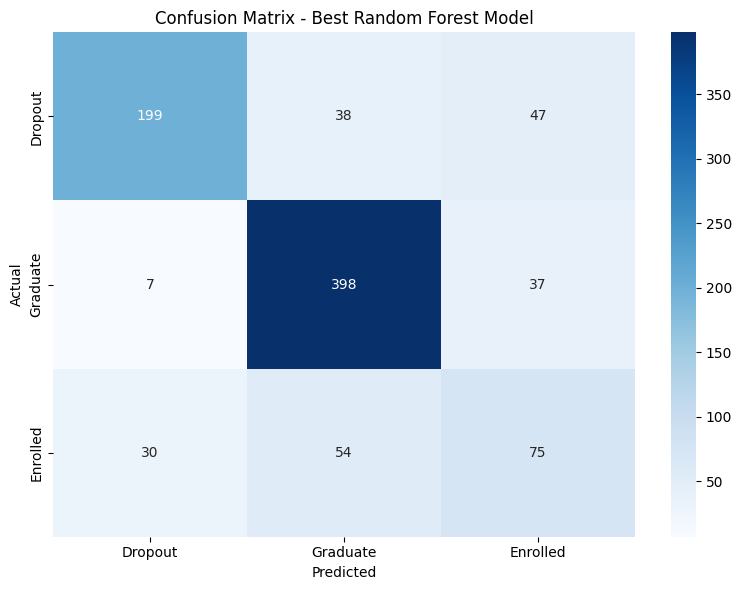

In [40]:
# Get predictions and compute confusion matrix
y_pred = best_model_rf.predict(X_test_final)
cm = confusion_matrix(y_test_final, y_pred)

# Define class labels
status_labels = ['Dropout', 'Graduate', 'Enrolled']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=status_labels,
    yticklabels=status_labels
)
plt.title('Confusion Matrix - Best Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

Confusion matrix dan classification report untuk model Random Forest yang telah dioptimalkan dengan hyperparameter terbaik (`n_estimators`: 382, `max_depth`: 20, `min_samples_split`: 3, dll.) menunjukkan performa klasifikasi status mahasiswa sebagai berikut:

*   **Graduate (Kelas 1):** Diprediksi dengan sangat baik. Model mengidentifikasi 398 dari 442 mahasiswa Graduate (recall 0.90), menghasilkan F1-score tertinggi (0.85). Kesalahan klasifikasi minimal (7 salah sebagai Dropout, 37 sebagai Enrolled).
*   **Dropout (Kelas 0):** Diprediksi dengan baik. Model mengidentifikasi 199 dari 284 mahasiswa Dropout (recall 0.70), dengan F1-score 0.77. Kesalahan utama adalah prediksi keliru sebagai Graduate (38) dan Enrolled (47).
*   **Enrolled (Kelas 2):** Kelas dengan prediksi paling menantang. Model mengidentifikasi 75 dari 159 mahasiswa Enrolled (recall 0.47), menghasilkan F1-score 0.47. Sering salah diklasifikasikan sebagai Graduate (54) dan Dropout (30).

Akurasi keseluruhan model Random Forest setelah tuning adalah 0.76 (atau 75.93%). Model ini sangat unggul dalam mengidentifikasi 'Graduate', cukup baik untuk 'Dropout', dan tetap menunjukkan kelemahan dalam memprediksi 'Enrolled'.

---
Dengan performa prediktif yang sangat kuat, dibuktikan oleh akurasi dan F1-score yang tinggi, serta kemampuan untuk memberikan pemahaman mendalam melalui analisis kepentingan fitur yang telah ditunjukkan, model **XGBoost** dipilih untuk tahap interpretasi. Langkah ini akan mengungkap faktor-faktor kunci yang paling memengaruhi status akademik mahasiswa, memberikan wawasan actionable dari model berperforma tinggi ini.

## Interpretation

In [41]:
def get_feature_importance():
    # Retrieve feature names from training data (including encoding results)
    all_features = X_train_final.columns.tolist()
    
    print("Jumlah fitur:", len(all_features))
    print("Jumlah importance:", len(best_model_xgboost.feature_importances_))

    if len(all_features) != len(best_model_xgboost.feature_importances_):
        raise ValueError("Panjang fitur tidak cocok dengan feature_importances_")
    
    # DataFrame
    importance_df = pd.DataFrame({
        'Feature': all_features,
        'Importance': best_model_xgboost.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    return importance_df

# Run
importance_df = get_feature_importance()
print("\nFeature Importance Rankings:")
print(importance_df)

Jumlah fitur: 36
Jumlah importance: 36

Feature Importance Rankings:
                                         Feature  Importance
16                       Tuition_fees_up_to_date        0.16
30             Curricular_units_2nd_sem_approved        0.14
18                            Scholarship_holder        0.05
24             Curricular_units_1st_sem_approved        0.05
28             Curricular_units_2nd_sem_enrolled        0.04
22             Curricular_units_1st_sem_enrolled        0.03
29          Curricular_units_2nd_sem_evaluations        0.03
15                                        Debtor        0.03
23          Curricular_units_1st_sem_evaluations        0.02
31                Curricular_units_2nd_sem_grade        0.02
27             Curricular_units_2nd_sem_credited        0.02
21             Curricular_units_1st_sem_credited        0.02
3                                         Course        0.02
32  Curricular_units_2nd_sem_without_evaluations        0.02
19              

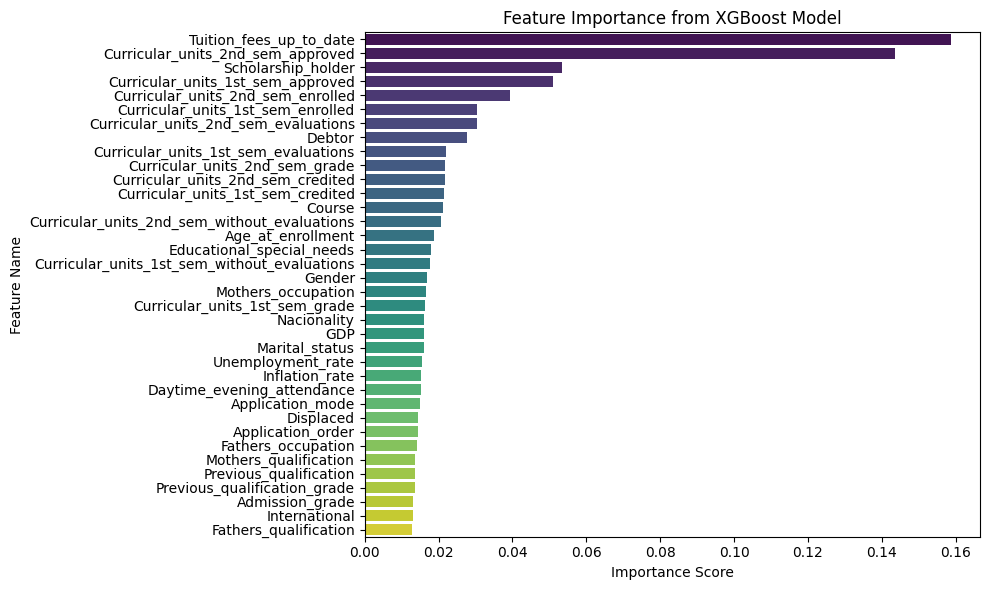

In [42]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance from XGBoost Model") 
plt.xlabel("Importance Score") 
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

Visualisasi ini menampilkan tingkat kepentingan fitur (feature importance) yang dihasilkan oleh model XGBoost, diurutkan dari yang paling penting hingga kurang penting.

*   **Fitur Paling Penting:**
    *   `Tuition_fees_up_to_date` (kelancaran biaya kuliah) adalah fitur dengan skor kepentingan tertinggi, menunjukkan pengaruh paling besar pada prediksi model.
    *   Diikuti oleh `Curricular_units_2nd_sem_approved` (jumlah SKS lulus semester 2) dan `Scholarship_holder` (penerima beasiswa).
*   **Pola Umum:** Fitur-fitur yang berkaitan dengan performa akademik (jumlah SKS yang disetujui dan diambil), status finansial (biaya kuliah, beasiswa, status debitur), dan beberapa aspek demografi (`Age_at_enrollment`, `Gender`) mendominasi peringkat atas.
*   **Fitur Kurang Penting:** Fitur seperti `Fathers_qualification`, `International`, dan `Admission_grade` menunjukkan skor kepentingan yang relatif rendah menurut model XGBoost ini.

In [43]:
# Create comprehensive results DataFrame with predictions and probabilities
results_df = pd.DataFrame({
    'Actual': y_test_final,
    'Predicted': y_pred,
    'Dropout_Prob': best_model_xgboost.predict_proba(X_test_final)[:, 0],
    'Graduate_Prob': best_model_xgboost.predict_proba(X_test_final)[:, 1],
    'Enrolled_Prob': best_model_xgboost.predict_proba(X_test_final)[:, 2]
})

# Add original feature values and inverse transform scaled features
for feature in selected_features:
    if feature in numerical_features:
        # Get the index of this feature in numerical_features list
        feature_idx = numerical_features.index(feature)
        # Inverse transform this specific feature
        original_values = scaler.inverse_transform(X_test_final[numerical_features])[:, feature_idx]
        results_df[feature] = original_values
    else:
        # Keep categorical features as is
        results_df[feature] = X_test_final[feature]

# Map numeric predictions back to status labels
status_map = {0: 'Dropout', 1: 'Graduate', 2: 'Enrolled'}
results_df['Actual_Status'] = results_df['Actual'].map(status_map)
results_df['Predicted_Status'] = results_df['Predicted'].map(status_map)

# Display sample results with original scale values
print("\nSample Predictions (with original scale):")
print(results_df.head(10))

# Show prediction statistics
print("\nPrediction Statistics:")
print(results_df['Predicted_Status'].value_counts())


Sample Predictions (with original scale):
      Actual  Predicted  Dropout_Prob  Graduate_Prob  Enrolled_Prob  \
2455       1          1          0.00           0.99           0.01   
1538       0          0          0.99           0.00           0.01   
2175       1          0          0.32           0.63           0.05   
2801       0          0          0.98           0.00           0.02   
3969       1          1          0.02           0.87           0.12   
4239       1          1          0.25           0.74           0.01   
3305       1          1          0.03           0.95           0.01   
1084       1          1          0.11           0.81           0.08   
2294       0          0          0.99           0.00           0.01   
2030       1          1          0.00           1.00           0.00   

      Curricular_units_2nd_sem_approved  Curricular_units_1st_sem_approved  \
2455                               6.00                               6.00   
1538               

## Conclution

Proyek ini bertujuan mengidentifikasi faktor-faktor kunci yang memengaruhi **status akademik mahasiswa** (Dropout, Graduate, Enrolled) dan membangun model prediktif `XGBoost` yang efektif, dioptimasi menggunakan Optuna.

---

**Faktor-Faktor Utama Penentu Status Akademik**
Berdasarkan analisis *feature importance* dari model XGBoost (lihat grafik "Feature Importance from XGBoost Model"):
*   **`Tuition_fees_up_to_date`**: Menjadi prediktor paling dominan, menunjukkan kelancaran pembayaran biaya kuliah sangat krusial terhadap status akademik.
*   **`Curricular_units_2nd_sem_approved`**: Jumlah SKS yang disetujui di semester kedua adalah kontributor signifikan kedua.
*   **`Scholarship_holder`**: Status sebagai penerima beasiswa juga berperan penting dalam prediksi.
*   Fitur lain seperti `Curricular_units_1st_sem_approved`, `Age_at_enrollment`, dan `Debtor` menunjukkan kontribusi penting lainnya.

**Rekomendasi Aksi Utama untuk Institusi Pendidikan**
1.  **Fokus pada Dukungan Finansial dan Akademik Awal**:
    *   Prioritaskan program untuk memastikan kelancaran `Tuition_fees_up_to_date`, mengingat ini adalah faktor terkuat.
    *   Berikan dukungan intensif pada performa akademik, khususnya `Curricular_units_approved` di semester pertama dan kedua.
2.  **Perkuat dan Promosikan Program Beasiswa**: `Scholarship_holder` terbukti sebagai faktor penting; evaluasi dan tingkatkan jangkauan serta efektivitas program beasiswa.
3.  **Identifikasi Risiko Berdasarkan Pola Akademik dan Demografi**: Gunakan wawasan dari fitur seperti `Age_at_enrollment` dan jumlah SKS yang diambil/dievaluasi untuk intervensi yang lebih spesifik pada kelompok mahasiswa tertentu.
4.  **Pemanfaatan Model Prediktif XGBoost**:
    *   Implementasikan model `XGBoost` untuk identifikasi dini mahasiswa yang berisiko `Dropout` atau kesulitan mencapai status `Graduate`, memungkinkan intervensi dukungan yang lebih cepat dan personal.
    *   Gunakan wawasan model untuk mengevaluasi dan menyempurnakan efektivitas program dukungan mahasiswa yang sudah ada, serta merancang strategi retensi yang lebih baik.
```fees_up_to_date`**: Menjadi prediktor terkuat (skor ~0.16), menunjukkan kelancaran pembayaran biaya kuliah sangat krusial.
*   **`Curricular_units_2nd_sem_approved`**: Jumlah SKS yang disetujui di semester kedua adalah kontributor signifikan kedua (skor ~0.14).
*   **`Scholarship_holder`**: Status sebagai penerima beasiswa juga berperan penting (skor ~0.07).
*   Fitur lain seperti `Curricular_units_1st_sem_approved` dan `Debtor` menunjukkan kontribusi moderat.

---

**Model Prediktif Terbaik (`XGBoostClassifier`)**
Setelah optimasi hyperparameter (parameter terbaik: `{'n_estimators': 427, 'learning_rate': 0.0357, 'max_depth': 13, 'min_child_weight': 1, 'subsample': 0.7596, 'colsample_bytree': 0.8474}`), model menunjukkan performa berikut pada data uji:
*   **Akurasi Keseluruhan**: 76.72%
*   **Recall (untuk Graduate)**: 0.93
*   **F1-Score (untuk Graduate)**: 0.86
*   **Recall (untuk Dropout)**: 0.71
*   **F1-Score (untuk Dropout)**: 0.77
*   **Confusion Matrix** (lihat grafik "Confusion Matrix - Best XGBoost Model"):
    *   Sangat baik mengidentifikasi 410 dari 442 mahasiswa yang benar-benar **Graduate**.
    *   Cukup baik mengidentifikasi 203 dari 284 mahasiswa yang **Dropout**.
    *   Masih kesulitan mengidentifikasi mahasiswa **Enrolled** (66 dari 159).
Model ini sangat efektif dalam memprediksi kelulusan dan cukup baik dalam mendeteksi risiko dropout, namun performanya lebih rendah untuk status 'Enrolled'.

---

**Rekomendasi Aksi Utama untuk Institusi Pendidikan**
1.  **Fokus pada `Tuition_fees_up_to_date`**:
    *   Sebagai faktor dominan, pastikan ada sistem pendukung untuk mahasiswa yang kesulitan membayar biaya kuliah tepat waktu, melalui skema cicilan atau bantuan keuangan.
2.  **Monitor Performa Akademik, Terutama `Curricular_units_2nd_sem_approved`**:
    *   Implementasikan sistem peringatan dini bagi mahasiswa yang menunjukkan penurunan jumlah SKS yang disetujui di semester kedua untuk intervensi akademik.
3.  **Dukungan untuk `Scholarship_holder` dan Penanganan `Debtor`**:
    *   Pastikan penerima beasiswa mendapatkan dukungan yang dibutuhkan untuk sukses.
    *   Tangani secara proaktif mahasiswa yang menjadi debitur, karena ini berkorelasi negatif dengan kesuksesan akademik.
4.  **Pemanfaatan Model Prediktif**:
    *   Implementasikan model `XGBoostClassifier` untuk identifikasi proaktif mahasiswa yang berisiko tinggi *Dropout* atau kesulitan akademik, memungkinkan intervensi yang lebih dini dan tertarget untuk meningkatkan angka kelulusan dan mengurangi dropout.

## Additional

In [44]:
!pip freeze > requirements.txt

### Dashboard Requirements 

In [45]:
# Create results dataset with predictions and probabilities 
df_results = pd.DataFrame({
    'StudentID': range(len(y_test_final)),  # Generate sequential IDs
    'Actual_Status': y_test_final,
    'Predicted_Status': y_pred,  # Using predictions from XGBoost
    'Dropout_Prob': best_model_xgboost.predict_proba(X_test_final)[:, 0],
    'Graduate_Prob': best_model_xgboost.predict_proba(X_test_final)[:, 1],
    'Enrolled_Prob': best_model_xgboost.predict_proba(X_test_final)[:, 2]
})

# Add original feature values and handle scaled features
for feature in X_test_final.columns:
    if feature in numerical_features:
        try:
            feature_idx = numerical_features.index(feature)
            original_values = scaler.inverse_transform(X_test_final[numerical_features])[:, feature_idx]
            df_results[feature] = original_values
        except Exception as e:
            print(f"Warning: Could not inverse transform {feature}: {e}")
            df_results[feature] = X_test_final[feature]
    else:
        df_results[feature] = X_test_final[feature]

# Map numeric predictions back to status labels
status_map = {0: 'Dropout', 1: 'Graduate', 2: 'Enrolled'}
df_results['Actual_Status_Label'] = df_results['Actual_Status'].map(status_map)
df_results['Predicted_Status_Label'] = df_results['Predicted_Status'].map(status_map)

# Create feature importance DataFrame using XGBoost model features
importance_df = pd.DataFrame({
    'Feature': X_test_final.columns,
    'Importance': best_model_xgboost.feature_importances_
}).sort_values('Importance', ascending=False)

# Export results to CSV
if not os.path.exists('dataset'):
    os.makedirs('dataset')

df_results.to_csv('dataset/student_prediction_results.csv', index=False)
importance_df.to_csv('dataset/feature_importance.csv', index=False)

# Verify exported data
print("\nSample of XGBoost Prediction Results:")
print(df_results.head())
print("\nXGBoost Feature Importance Rankings:")
print(importance_df)


Sample of XGBoost Prediction Results:
      StudentID  Actual_Status  Predicted_Status  Dropout_Prob  Graduate_Prob  \
2455          0              1                 1          0.00           0.99   
1538          1              0                 0          0.99           0.00   
2175          2              1                 0          0.32           0.63   
2801          3              0                 0          0.98           0.00   
3969          4              1                 1          0.02           0.87   

      Enrolled_Prob  Marital_status  Application_mode  Application_order  \
2455           0.01               1                44                  1   
1538           0.01               1                18                  5   
2175           0.05               1                 1                  1   
2801           0.02               1                44                  1   
3969           0.12               1                44                  1   

      Course  ...

### Save Clean Dataset

In [46]:
# Prepare clean dataset with predictions
df_dashboard = df.copy()
df_dashboard = df_dashboard.dropna()

# Add StudentID for tracking
if 'StudentID' not in df_dashboard.columns:
    df_dashboard['StudentID'] = df_dashboard.index + 1

# Get predictions using best_model_xgboost
X_dashboard = df_dashboard[X_test_final.columns]  
df_dashboard['Predicted_Status_Label'] = pd.Series(
    best_model_xgboost.predict(X_dashboard)
).map({0: 'Dropout', 1: 'Graduate', 2: 'Enrolled'})

# Get probabilities
probs = best_model_xgboost.predict_proba(X_dashboard)
df_dashboard['Dropout_Prob'] = probs[:, 0]
df_dashboard['Graduate_Prob'] = probs[:, 1]
df_dashboard['Enrolled_Prob'] = probs[:, 2]

# Save dashboard dataset
df_dashboard.to_csv('dataset/dashboard_full_predictions.csv', index=False)

# Show summary
print(f"\nTotal predictions: {len(df_dashboard)}")
print("\nSample predictions:")
print(df_dashboard[['StudentID', 'Predicted_Status_Label',
                   'Dropout_Prob', 'Graduate_Prob', 'Enrolled_Prob']].head())


Total predictions: 4424

Sample predictions:
   StudentID Predicted_Status_Label  Dropout_Prob  Graduate_Prob  \
0          1               Enrolled          0.40           0.07   
1          2               Graduate          0.21           0.77   
2          3                Dropout          0.90           0.02   
3          4               Graduate          0.02           0.97   
4          5               Graduate          0.02           0.97   

   Enrolled_Prob  
0           0.53  
1           0.02  
2           0.08  
3           0.00  
4           0.02  


### Save Model

In [47]:
import joblib

# Create model directory if it doesn't exist
if not os.path.exists('model'):
    os.makedirs('model')

# Save best model and scaler
joblib.dump(best_model_xgboost, 'model/best_model.joblib')
joblib.dump(scaler, 'model/scaler.joblib')

print("\nModel saved successfully!")
print("Saved files:")
print("- best_model.joblib: XGBoost model")
print("- scaler.joblib: StandardScaler for numerical features")


Model saved successfully!
Saved files:
- best_model.joblib: XGBoost model
- scaler.joblib: StandardScaler for numerical features
